## STARTUPS
Chiara Totaro
Proyecto EDA 

### #1 IMPORT LIBRERIAS

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from bootcampviztools import *
from funciones import *
from scipy.stats import chi2_contingency
from scipy import stats

#### LOAD DATA

In [2]:
# Cargar el DataFrame y visualizo todas las columnas
df_startup = pd.read_csv("./data/big_startup_secsees_dataset.csv")
pd.set_option("display.max_columns", None) 

In [3]:
df_startup

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,1587301,operating,CHN,22,Beijing,Beijing,1,NaN,2012-04-01,2012-04-01
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,114304,operating,HRV,15,Split,Split,4,2012-05-13,2011-11-01,2014-03-01
66365,/organization/Áeron,ÁERON,http://www.aeron.hu/,NaN,-,operating,NaN,NaN,NaN,NaN,1,2011-01-01,2014-08-01,2014-08-01
66366,/organization/Ôasys-2,Ôasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,18192,operating,USA,CA,SF Bay Area,San Francisco,1,2014-01-01,2015-01-01,2015-01-01


In [4]:
# Información básica del DataFrame
print("Información básica del DataFrame:")
print(df_startup.info())

Información básica del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   permalink          66368 non-null  object
 1   name               66367 non-null  object
 2   homepage_url       61310 non-null  object
 3   category_list      63220 non-null  object
 4   funding_total_usd  66368 non-null  object
 5   status             66368 non-null  object
 6   country_code       59410 non-null  object
 7   state_code         57821 non-null  object
 8   region             58338 non-null  object
 9   city               58340 non-null  object
 10  funding_rounds     66368 non-null  int64 
 11  founded_at         51147 non-null  object
 12  first_funding_at   66344 non-null  object
 13  last_funding_at    66368 non-null  object
dtypes: int64(1), object(13)
memory usage: 7.1+ MB
None


#### EDA - Preprocessing

##### #2.0 DROP COLUMNAS IRRELEVANTES

In [5]:
# Elimino columnas no relevantes para mi analisis
df_startup.drop("permalink",axis=1,inplace=True)
df_startup.drop("homepage_url",axis=1,inplace=True)
df_startup.drop("state_code",axis=1,inplace=True)


In [6]:
df = df_startup.copy()
# df.index = range(len(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               66367 non-null  object
 1   category_list      63220 non-null  object
 2   funding_total_usd  66368 non-null  object
 3   status             66368 non-null  object
 4   country_code       59410 non-null  object
 5   region             58338 non-null  object
 6   city               58340 non-null  object
 7   funding_rounds     66368 non-null  int64 
 8   founded_at         51147 non-null  object
 9   first_funding_at   66344 non-null  object
 10  last_funding_at    66368 non-null  object
dtypes: int64(1), object(10)
memory usage: 5.6+ MB


#### #2 ANALISIS MISSING y TRANSFORMACION

In [7]:
#Funcion que me visualiza el porcentaje y la cantidad de missing 
# para monitorar despues de cada clean-processing
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,66367,object,1,0.001507
category_list,63220,object,3148,4.743250
funding_total_usd,66368,object,0,0.000000
status,66368,object,0,0.000000
country_code,59410,object,6958,10.483968
region,58338,object,8030,12.099204
city,58340,object,8028,12.096191
funding_rounds,66368,int64,0,0.000000
founded_at,51147,object,15221,22.934245
first_funding_at,66344,object,24,0.036162


##### 2.1 ANALISIS MISSING : name
 - name tiene un missing, que contiene datos en las otras columnas : asigno un nombre aleatoria a la startup sin nombre

In [8]:
# name tiene un missing: la fila contiene info, asigno un nombre para no perder la info
df['name'] = df['name'].fillna('NoName')

##### 2.2 ANALISIS MISSING y TRANSFORMACION FECHAS founded_at first_funding_at

MISSING 
Los missing values de founded_at faltantes son el 22.9% del total, de fist_founding_at del 0.03%
 - los nulos no coinciden, es decir cuando no hay valor en founded_at, los hay en first_funding_at y viceversa --> 
    - sustituyo los valores missing de first_funding_at en founding_at y viceversa
 - Solo quedan 3 valores con nulos coincidentes, los elimino.


TRANFORMACION 
- Conversion de las fechas en Datetime
- Creacion de la columna founded_at_year(int) para mejor manejo para futuras analisis

- SLICING fechas :
  - elimino fechas superiores a 2025 --> elimino posibles anomalias
  - Decido eliminar las startup con fechas de creacion anterior al año 1980 para un mejor analisis comparando contextos economicos mas recientes


In [9]:
#Miro cantidad de nulos que coinciden en la fechas founded_at y first_funding_at
nulos_fechas = df[df[["founded_at","first_funding_at"]].isna().all(axis=1)]
len(nulos_fechas)

3

In [10]:
# Sostitucion missing founded_at con first_funding_at
es_founded_nulo = df.founded_at.isna()
df.loc[es_founded_nulo, "founded_at"] = df.loc[es_founded_nulo,"first_funding_at"]

# Sostitucion missing first_funding_at con founded_at
es_first_funding_nulo = df.first_funding_at.isna()

df.loc[es_first_funding_nulo, "first_funding_at"] = df.loc[es_first_funding_nulo,"founded_at"]

In [11]:
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,66368,object,0,0.000000
category_list,63220,object,3148,4.743250
funding_total_usd,66368,object,0,0.000000
status,66368,object,0,0.000000
country_code,59410,object,6958,10.483968
region,58338,object,8030,12.099204
city,58340,object,8028,12.096191
funding_rounds,66368,int64,0,0.000000
founded_at,66365,object,3,0.004520
first_funding_at,66365,object,3,0.004520


In [12]:
# Elimino los 3 registros que no tienen fechas en founded_at y first_funding_at
df = df.dropna(subset=['founded_at'])
df = df.dropna(subset=['first_funding_at'])
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,66365,object,0,0.000000
category_list,63217,object,3148,4.743464
funding_total_usd,66365,object,0,0.000000
status,66365,object,0,0.000000
country_code,59407,object,6958,10.484442
region,58335,object,8030,12.099751
city,58337,object,8028,12.096738
funding_rounds,66365,int64,0,0.000000
founded_at,66365,object,0,0.000000
first_funding_at,66365,object,0,0.000000


In [13]:
# Convierto las columnas de fechas en datatime format %Y-%m-%d.astype(int)
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors = 'coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce', format='%Y-%m-%d')

In [14]:
# Creo columnas de año de creacion (founded_at_year)

df['founded_at_year'] = df['founded_at'].dt.year
#df['founded_at_year_month'] = df['founded_at'].dt.to_period('M').astype(str)
#df['first_funding_year_month'] = df['first_funding_at'].dt.to_period('M').astype(str)
#df['last_funding_year_month'] = df['last_funding_at'].dt.to_period('M').astype(str)


#### SLICING eliminado startup de antes 19xx

In [15]:
# startup_after_1980 = df[df["founded_at_year"] >= 1980] 
# startup_since_now = df[df["founded_at_year"] < 2025]

df = df[(df["founded_at_year"] >= 1980) & (df["founded_at_year"] < 2025)]
df = df[(df["first_funding_at"] < '2025/01/01')]

In [16]:
df.founded_at.sort_values()

14102   1980-01-01
47159   1980-01-01
10194   1980-01-01
9271    1980-01-01
11486   1980-01-01
           ...    
32485   2015-12-04
52909   2015-12-15
2927    2015-12-23
30842   2016-01-01
34438   2016-04-02
Name: founded_at, Length: 65733, dtype: datetime64[ns]

In [17]:
df['founded_at_year'] = df['founded_at_year'].astype(int)
df.sort_values(by="founded_at", inplace=True)


In [18]:
df

,name,category_list,funding_total_usd,status,country_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year
14102,CSX Corporation,Public Transportation|Services|Transportation,300000000,ipo,USA,Jacksonville,Jacksonville,1,1980-01-01,2003-02-28,2003-02-28,1980
47159,RealD,Broadcasting|Games,72000000,acquired,USA,Los Angeles,Beverly Hills,3,1980-01-01,2007-03-21,2008-12-15,1980
10194,Unnati Silks Pvt Ltd,E-Commerce|Wholesale,3500000,operating,IND,Chennai,Chennai,1,1980-01-01,2012-05-01,2012-05-01,1980
9271,Callaway Digital Arts,Mobile,6000000,operating,USA,New York City,New York,1,1980-01-01,2010-11-01,2010-11-01,1980
11486,Clean Harbors,Clean Technology,-,closed,USA,Boston,Norwell,1,1980-01-01,1987-08-18,1987-08-18,1980
...,...,...,...,...,...,...,...,...,...,...,...,...
32485,LindaCare,Health Care,1600332.8692368,operating,BEL,Brussels,Brussels,1,2015-12-04,2015-12-04,2015-12-04,2015
52909,Socialcam,Android|Apps|File Sharing|iPhone|Mobile|Video,-,acquired,NaN,NaN,NaN,1,2015-12-15,2012-04-30,2012-04-30,2015
2927,American Development Group,Real Estate,5300000,operating,USA,New York City,Brooklyn,1,2015-12-23,2015-01-09,2015-01-09,2015
30842,KleenResource,Biotechnology|Health Services Industry|Medical,-,operating,USA,Charlotte,Charlotte,1,2016-01-01,2015-04-10,2015-04-10,2016


##### 2.3 ANALISIS MISSING y TRANSFORMACION en COUNTRY

Country_code utiliza el codigo iso alpha3

MISSING
 - Los missing en Country_code corresponden a un 10% 
 - Coinciden tambien con los Nan de Region y city, con lo cual no tengo mas informacion para saber que valor attribuirle.
   - Decido eliminarlos

TRANSFORMACION
 - Creo una nueva columna Country aagrupando valores segun continente: 
   - USA
   - EU (agrupo todos los codigos de los paises de EU)
   - RDM Resto del Mundo : todos los restantes

  - De esta manera baja la cardinalidad de country y la considero variable categorica
   

In [19]:
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,65733,object,0,0.000000
category_list,62656,object,3077,4.681058
funding_total_usd,65733,object,0,0.000000
status,65733,object,0,0.000000
country_code,58808,object,6925,10.535043
region,57747,object,7986,12.149149
city,57749,object,7984,12.146106
funding_rounds,65733,int64,0,0.000000
founded_at,65733,datetime64[ns],0,0.000000
first_funding_at,65733,datetime64[ns],0,0.000000


In [20]:
#Miro cantidad de nulos que coinciden en country_code y region
nulos_country = df[df[["country_code","region"]].isna().all(axis=1)]
len(nulos_country)

6925

In [21]:
df = df.dropna(subset = "country_code")

In [22]:
df.country_code.nunique()

136

In [23]:
#Lista codigo isp alpha3 de los estados de europa
#df["country_code"].unique()
col_EU = [      #european_countries_iso_alpha3
    "ALB",  # Albania
    "AND",  # Andorra
    "AUT",  # Austria
    "BLR",  # Belarus
    "BEL",  # Belgium
    "BIH",  # Bosnia and Herzegovina
    "BGR",  # Bulgaria
    "HRV",  # Croatia
    "CYP",  # Cyprus
    "CZE",  # Czech Republic
    "DNK",  # Denmark
    "EST",  # Estonia
    "FIN",  # Finland
    "FRA",  # France
    "DEU",  # Germany
    "GRC",  # Greece
    "HUN",  # Hungary
    "ISL",  # Iceland
    "IRL",  # Ireland
    "ITA",  # Italy
    "XKX",  # Kosovo
    "LVA",  # Latvia
    "LIE",  # Liechtenstein
    "LTU",  # Lithuania
    "LUX",  # Luxembourg
    "MLT",  # Malta
    "MDA",  # Moldova
    "MCO",  # Monaco
    "MNE",  # Montenegro
    "NLD",  # Netherlands
    "MKD",  # North Macedonia
    "NOR",  # Norway
    "POL",  # Poland
    "PRT",  # Portugal
    "ROU",  # Romania
    "SMR",  # San Marino
    "SRB",  # Serbia
    "SVK",  # Slovakia
    "SVN",  # Slovenia
    "ESP",  # Spain
    "SWE",  # Sweden
    "CHE",  # Switzerland
    "TUR",  # Turkey
    "UKR",  # Ukraine
    "GBR",  # United Kingdom
    "VAT"   # Vatican City (Holy See)
]

In [24]:
# Creo columna country agrupando las startup segun continente : 
# USA - EU - RDM Resto del mundo
df["country"] = df["country_code"].apply(
    lambda x: "USA" if x == "USA" else ("EU" if x in col_EU else "RDM")
)
df.country.value_counts()

C:\Users\PC\AppData\Local\Temp\ipykernel_13332\3658391110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"] = df["country_code"].apply(


country
USA    37140
EU     10894
RDM    10774
Name: count, dtype: int64

In [25]:
df.country_code.nunique()/len(df) * 100
print(df.country.nunique()/len(df) * 100)

0.005101346755543463


#### 2.4 ANALISIS MISSING y TRANSFORMACION en REGION y CITY

TRANSFORMACION
  - region y city nos dan la misma info (el 90% de los valores coindice totalmente), puedo agruparla y eliminar la columna city
   - Elimino la columna City y renombro la columan region : region_city

MISSING
 - Region y City tienen mismo % de missing : 12%
 - sostituyo los valores valores nulos en region_city y asigno la ciudad que corresponde a la moda del pais country_code
 

 

In [26]:
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,58808,object,0,0.000000
category_list,57263,object,1545,2.627194
funding_total_usd,58808,object,0,0.000000
status,58808,object,0,0.000000
country_code,58808,object,0,0.000000
region,57747,object,1061,1.804176
city,57749,object,1059,1.800775
funding_rounds,58808,int64,0,0.000000
founded_at,58808,datetime64[ns],0,0.000000
first_funding_at,58808,datetime64[ns],0,0.000000


In [27]:
#analisis Valores Nulos en Region y city
nulos_region_city = df[df[["region","city"]].isna().any(axis=1)]

if len(nulos_region_city) == df.region.isna().sum():
    print("Los valores nulos coinciden en Region y City")


Los valores nulos coinciden en Region y City


In [28]:
#Mostrar los valores duplicados de region y city
duplicados = df[df.duplicated(subset=["region","city"], keep=False)]
len(duplicados)/len(df)

0.9488675010202694

In [29]:
df = df.rename(columns={'region': 'region_city'})
df.drop("city",axis=1,inplace=True)

In [30]:
# sostitucion valores nulos en region_city
# asigno la ciudad que corresponde a la moda del pais
moda_por_country = df.groupby('country_code')['region_city'].agg(lambda x: x.mode())
moda_por_country
df['region_city'] = df.apply(
    lambda row: row['region_city'] if pd.notnull(row['region_city']) else moda_por_country[row['country_code']],
    axis=1)

df['region_city'] = df['region_city'].astype(str)

#### 2.5 ANALISIS MISSING category_list

MISSING
 - El campo category_list presenta un 2.6%  de missing, le asigno "Other" 

TRANSFORMACION
 - Siendo el campo una lista de valores, La columna category_list contiene valores con varios campos, separados por | 
 - Para simplificar, creo una columna llamada sector, suponiendo que la primera descripción en la category_list se refiere a la categoría principal.
   - Se reduce la cardinalidad de category de un 41%  al 1,2%

In [31]:
Calcular_missing(df)


Cantidad de valores nulos y porcentaje por columna:


,Valores totales,Tipo,Valores faltantes,Porcentaje faltante (%)
name,58808,object,0,0.000000
category_list,57263,object,1545,2.627194
funding_total_usd,58808,object,0,0.000000
status,58808,object,0,0.000000
country_code,58808,object,0,0.000000
region_city,58808,object,0,0.000000
funding_rounds,58808,int64,0,0.000000
founded_at,58808,datetime64[ns],0,0.000000
first_funding_at,58808,datetime64[ns],0,0.000000
last_funding_at,58808,datetime64[ns],0,0.000000


In [32]:
df.category_list.value_counts(dropna=False, normalize=True)

category_list
Software                                                                                                                                                                                        0.064447
Biotechnology                                                                                                                                                                                   0.059108
NaN                                                                                                                                                                                             0.026272
E-Commerce                                                                                                                                                                                      0.020490
Clean Technology                                                                                                                                                                      

In [33]:
es_category_nulo = df.category_list.isna()
es_category_nulo

df.loc[es_category_nulo, "category_list"] = "Other"

In [34]:
main_category = []

for i in df['category_list']:
    if not isinstance(i,str):
      main_category.append('Other')
    else:
      main_category.append(i.split('|')[0])

df['sector'] = main_category

In [35]:
print(f"cardinalidad columna category list original : {round(df.category_list.nunique()/len(df) *100, 2)} %")
print(f"cardinalidad columna main category : {round(df.sector.nunique()/len(df) * 100, 2)} %")


cardinalidad columna category list original : 41.86 %
cardinalidad columna main category : 1.23 %


#### 2.6 ANALISIS funding_total_usd

funding_total_usd es el total de financiamiento en dólares estadounidenses que ha recibido cada startups

TRANSFORMACION
 - Es de tipo str, lo transformo en numerico float.
 - los datos de la columnas funding_total_usd presentan una gran disparidad de valores, desde 1 hasta orden e+10. Ademas presentan una distribucion muy sesgada. 
 Para hacer los datos más manejables, y para la succesiva analisis visual, TRANSFORMO estos datos numéricos usando logaritmos en base 10.

MISSING
 - parece no haya NaN, pero despues de la transformacion en float, habia valores "-" que hemos transformado en NaN --> porcentaje de missing es del 17,5% (). Los elimino

In [36]:
df.funding_total_usd.value_counts(normalize=True)

funding_total_usd
-                   0.175520
1000000             0.017889
500000              0.014828
100000              0.014403
2000000             0.012600
                      ...   
2400555.12837344    0.000017
470313.365243842    0.000017
11180367.275065     0.000017
27576610            0.000017
167371              0.000017
Name: proportion, Length: 17532, dtype: float64

In [37]:
def str_to_float(row):
    if '-' in row:
        row = np.nan
    else:
        row = float(row)
    return row
        
df['funding_total_usd'] = df['funding_total_usd'].apply(str_to_float)
df['funding_total_usd'].dtypes

dtype('float64')

In [38]:
df['funding_total_usd'] = df['funding_total_usd'].astype(float)


In [39]:
df = df.dropna(subset = "funding_total_usd")

In [40]:
df.funding_total_usd.sort_values()

50666    1.000000e+00
54684    1.000000e+00
55916    2.000000e+00
31163    2.000000e+00
36982    5.000000e+00
             ...     
10708    5.162513e+09
49721    5.800000e+09
11608    5.820000e+09
60155    8.207450e+09
61562    3.007950e+10
Name: funding_total_usd, Length: 48486, dtype: float64

In [41]:
df

,name,category_list,funding_total_usd,status,country_code,region_city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,country,sector
14102,CSX Corporation,Public Transportation|Services|Transportation,3.000000e+08,ipo,USA,Jacksonville,1,1980-01-01,2003-02-28,2003-02-28,1980,USA,Public Transportation
47159,RealD,Broadcasting|Games,7.200000e+07,acquired,USA,Los Angeles,3,1980-01-01,2007-03-21,2008-12-15,1980,USA,Broadcasting
10194,Unnati Silks Pvt Ltd,E-Commerce|Wholesale,3.500000e+06,operating,IND,Chennai,1,1980-01-01,2012-05-01,2012-05-01,1980,RDM,E-Commerce
9271,Callaway Digital Arts,Mobile,6.000000e+06,operating,USA,New York City,1,1980-01-01,2010-11-01,2010-11-01,1980,USA,Mobile
22968,Gini & Jony,E-Commerce,1.800000e+07,operating,IND,Mumbai,1,1980-01-01,2013-05-14,2013-05-14,1980,RDM,E-Commerce
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,Easy Khaana,Other,1.000000e+05,operating,IND,New Delhi,1,2015-12-03,2015-12-03,2015-12-03,2015,RDM,Other
63189,Wayfindr,Other,1.000000e+06,operating,GBR,London,1,2015-12-03,2015-12-03,2015-12-03,2015,EU,Other
18297,Enlibrium,Other,1.500000e+07,operating,USA,San Diego,1,2015-12-03,2015-12-03,2015-12-03,2015,USA,Other
32485,LindaCare,Health Care,1.600333e+06,operating,BEL,Brussels,1,2015-12-04,2015-12-04,2015-12-04,2015,EU,Health Care


In [42]:
df['funding_log'] =np.log10(df['funding_total_usd']) 
# transformo los numeros en log10
# df['funding_billions'] = df['funding_total_usd'] / 1e9 # transformo los numeros en Billions

In [43]:
df

,name,category_list,funding_total_usd,status,country_code,region_city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,country,sector,funding_log
14102,CSX Corporation,Public Transportation|Services|Transportation,3.000000e+08,ipo,USA,Jacksonville,1,1980-01-01,2003-02-28,2003-02-28,1980,USA,Public Transportation,8.477121
47159,RealD,Broadcasting|Games,7.200000e+07,acquired,USA,Los Angeles,3,1980-01-01,2007-03-21,2008-12-15,1980,USA,Broadcasting,7.857332
10194,Unnati Silks Pvt Ltd,E-Commerce|Wholesale,3.500000e+06,operating,IND,Chennai,1,1980-01-01,2012-05-01,2012-05-01,1980,RDM,E-Commerce,6.544068
9271,Callaway Digital Arts,Mobile,6.000000e+06,operating,USA,New York City,1,1980-01-01,2010-11-01,2010-11-01,1980,USA,Mobile,6.778151
22968,Gini & Jony,E-Commerce,1.800000e+07,operating,IND,Mumbai,1,1980-01-01,2013-05-14,2013-05-14,1980,RDM,E-Commerce,7.255273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16976,Easy Khaana,Other,1.000000e+05,operating,IND,New Delhi,1,2015-12-03,2015-12-03,2015-12-03,2015,RDM,Other,5.000000
63189,Wayfindr,Other,1.000000e+06,operating,GBR,London,1,2015-12-03,2015-12-03,2015-12-03,2015,EU,Other,6.000000
18297,Enlibrium,Other,1.500000e+07,operating,USA,San Diego,1,2015-12-03,2015-12-03,2015-12-03,2015,USA,Other,7.176091
32485,LindaCare,Health Care,1.600333e+06,operating,BEL,Brussels,1,2015-12-04,2015-12-04,2015-12-04,2015,EU,Health Care,6.204210


In [44]:
df = df[df['funding_total_usd'] != df['funding_total_usd'].max()] #elimino valor anomalo
df.describe()

,funding_total_usd,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,funding_log
count,4.848500e+04,48485.000000,48485,48485,48485,48485.000000,48485.000000
mean,1.753042e+07,1.937548,2008-11-25 03:14:08.897597184,2011-05-16 14:09:01.874806784,2012-07-27 23:39:17.949881600,2008.641394,6.277863
min,1.000000e+00,1.000000,1980-01-01 00:00:00,1982-12-01 00:00:00,1982-12-01 00:00:00,1980.000000,0.000000
25%,4.000000e+05,1.000000,2006-08-01 00:00:00,2009-07-06 00:00:00,2011-01-25 00:00:00,2006.000000,5.602060
50%,2.100000e+06,1.000000,2010-08-01 00:00:00,2012-04-01 00:00:00,2013-09-01 00:00:00,2010.000000,6.322219
75%,1.049451e+07,2.000000,2012-12-18 00:00:00,2014-02-01 00:00:00,2014-11-29 00:00:00,2012.000000,7.020962
max,8.207450e+09,19.000000,2015-12-23 00:00:00,2015-12-05 00:00:00,2105-05-01 00:00:00,2015.000000,9.914208
std,1.018591e+08,1.499628,NaN,NaN,NaN,5.455254,1.022705


TABLA DE DESCRIPCION DE LAS COLUMNAS DEL DATASET LIMPIO 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48485 entries, 14102 to 2927
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               48485 non-null  object        
 1   category_list      48485 non-null  object        
 2   funding_total_usd  48485 non-null  float64       
 3   status             48485 non-null  object        
 4   country_code       48485 non-null  object        
 5   region_city        48485 non-null  object        
 6   funding_rounds     48485 non-null  int64         
 7   founded_at         48485 non-null  datetime64[ns]
 8   first_funding_at   48485 non-null  datetime64[ns]
 9   last_funding_at    48485 non-null  datetime64[ns]
 10  founded_at_year    48485 non-null  int64         
 11  country            48485 non-null  object        
 12  sector             48485 non-null  object        
 13  funding_log        48485 non-null  float64       
dtypes: datet

In [46]:
# df.status.value_counts()
# # Crear una nueva columna 'new_status' juntando adquired e ipo - que corresponden a la condicion success
# df['new_status'] = df['status'].apply(lambda x: 'acquired_ipo' if x in ['acquired', 'ipo'] else x)



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Col1|Se trata de la variable que mide x...|||||


| Columna/Variable | Descripción |Tipo|
| ---------------- | ----------- |----|
| name       | Nombre de la startup | |
| category_list      | lista de categorías donde opera | |
| funding_total_usd       | Financiacion total recibida (en dolares estadunidenses)  | | Numerico 
| status       | Indica si la compañia sigue operativa o no, o si ha sido adquirida por compañias privadas o publicas | Categorica - variable dominante|
| country_code       | Codigo del pais -segun iso_alpha3- | Categorica|
| region_city      | Indica la ciudad/region donde se ha creado la compañia | |
| funding_rounds       | Numeros de rondas de financiacion | Categorica|
| founded_at      | Fecha de creacion | |
| first_funding_at      | Fecha de primera ronda de financiacion | Binaria|
| last_funding_at      | Fecha de la ultima ronda de financiacion recibida | bool|
| founded_at_year      | Año de creacion | |
| sector      | Sector principal en el cual opera la compañia | |
| country      | Codigo : USA - EU - RDM | |

DEFINICION DE VARIABLES TARGET A ANALIZAR 

CARDINALIDAD y TIPIFICACION 

In [47]:
#funcion que devuelve la cardinalidad
card_tipo(df)

,Card,%_Card,Tipo,tipo_sugerido
name,48352,99.725688,object,Numerica continua
category_list,21119,43.557801,object,Numerica continua
funding_total_usd,17530,36.155512,float64,Numerica continua
status,4,0.00825,object,Categorica
country_code,133,0.274312,object,Numerica discreta
region_city,1040,2.144993,object,Numerica discreta
funding_rounds,19,0.039187,int64,Categorica
founded_at,4225,8.714035,datetime64[ns],Numerica discreta
first_funding_at,4457,9.192534,datetime64[ns],Numerica discreta
last_funding_at,4106,8.468599,datetime64[ns],Numerica discreta


In [48]:
#Variables Categoricas:
categoricas = [ "status",
               "country",
               #"region_city",
               "funding_rounds",
               "founded_at_year",
               #"sector"
    
]

### #3 Análisis Univariante : : Visual y numerica
  - Categoricas : Moda, Frequencias (Absolutas y Relativas)
  - Numericas : Tendencias Central (mediana, media), rangos, posicion(percentiles-quartiles, IQR, CV), distribucion (histograma, densidad probabilidad)

In [49]:
df.status.value_counts()

status
operating    38799
acquired      4556
closed        3803
ipo           1327
Name: count, dtype: int64

In [50]:
# Creo variable exit_status agrupando el status : IPO - salida a bolsa o acquired, 
# que son las dos condiciones de "EXIT" de una startup. 

col_exit=[ "ipo", "acquired"]
df["exit_status"] = df["status"].apply(
    lambda x: "operating" if x == "operating" else ("exit" if x in col_exit else "closed")
)
df.exit_status.value_counts()

C:\Users\PC\AppData\Local\Temp\ipykernel_13332\1155046199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["exit_status"] = df["status"].apply(


exit_status
operating    38799
exit          5883
closed        3803
Name: count, dtype: int64

In [51]:
#Variables Categoricas:
categoricas = [ "status",
               "exit_status",
               "country",
               #"region_city",
               "funding_rounds",
               #"founded_at_year",
               #"sector"   
]

In [52]:
df[categoricas].mode().T

,0
status,operating
exit_status,operating
country,USA
funding_rounds,1


##### FREQUENCIA ABSOLUTAS

In [53]:
for catego in categoricas:
    print(f"Para {catego.upper()}")
    print(df[catego].value_counts())
    print("\n"*2)

Para STATUS
status
operating    38799
acquired      4556
closed        3803
ipo           1327
Name: count, dtype: int64



Para EXIT_STATUS
exit_status
operating    38799
exit          5883
closed        3803
Name: count, dtype: int64



Para COUNTRY
country
USA    31056
EU      8806
RDM     8623
Name: count, dtype: int64



Para FUNDING_ROUNDS
funding_rounds
1     26753
2     10785
3      5217
4      2632
5      1408
6       754
7       411
8       209
9       124
10       76
11       50
12       26
13       15
15        6
16        6
14        6
18        3
17        3
19        1
Name: count, dtype: int64





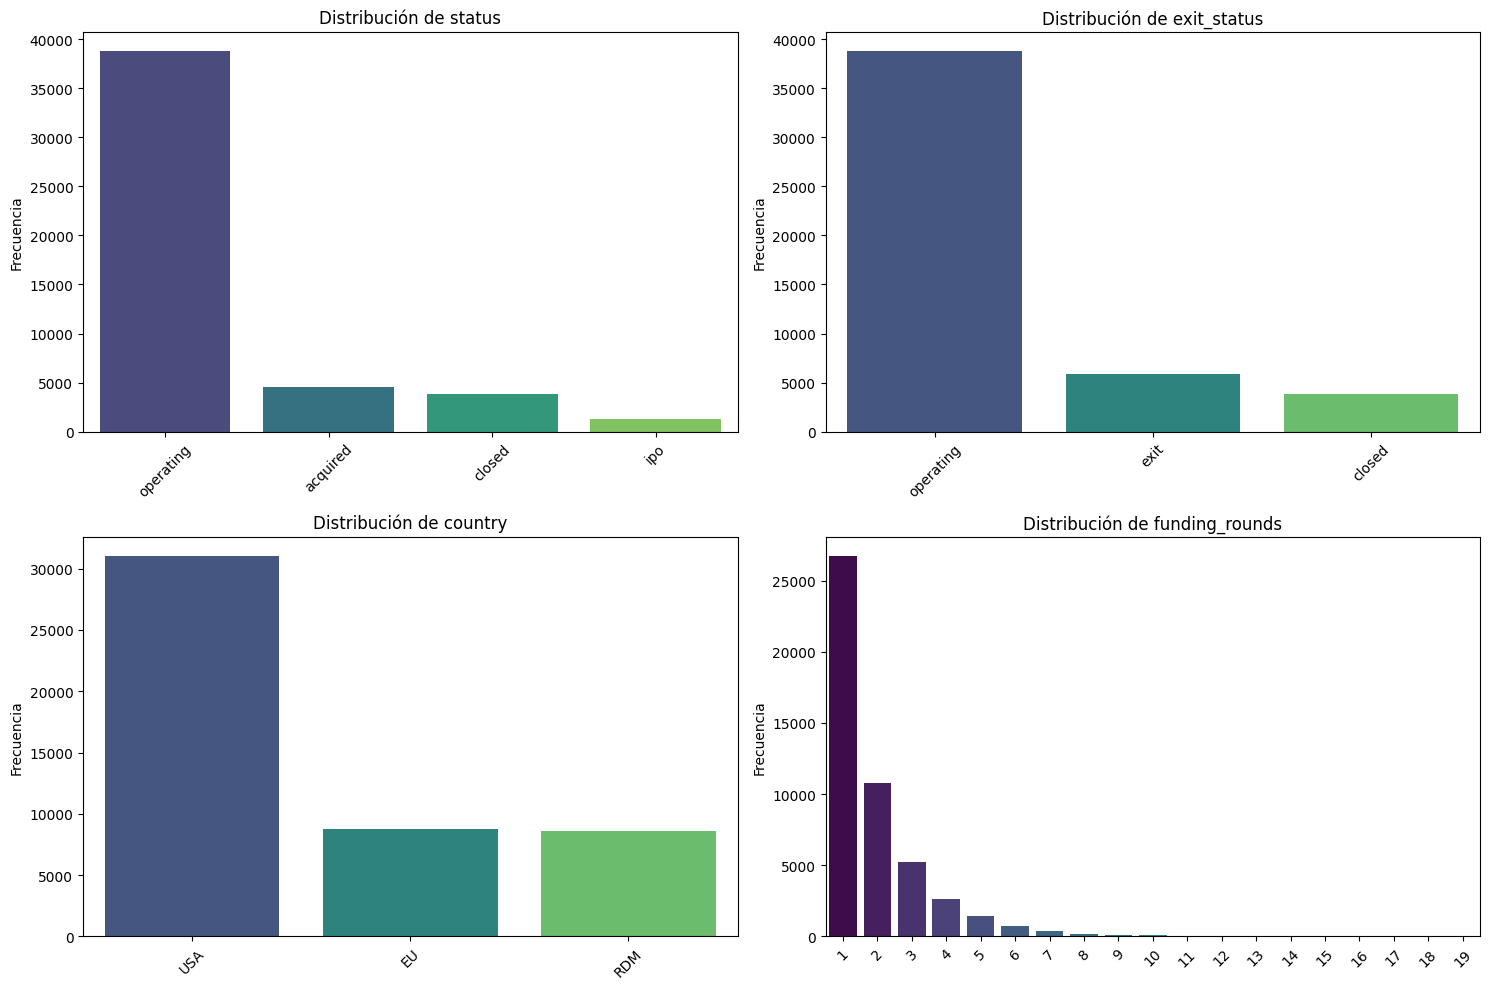

In [54]:
pinta_distribucion_categoricas(df, categoricas)

##### FREQUENCIAS RELATIVAS

In [55]:
for catego in categoricas:
    print(f"Para {catego.upper()}")
    print((df[catego].value_counts()/len(df) * 100).round(2), )
    print("\n"*2)

Para STATUS
status
operating    80.02
acquired      9.40
closed        7.84
ipo           2.74
Name: count, dtype: float64



Para EXIT_STATUS
exit_status
operating    80.02
exit         12.13
closed        7.84
Name: count, dtype: float64



Para COUNTRY
country
USA    64.05
EU     18.16
RDM    17.78
Name: count, dtype: float64



Para FUNDING_ROUNDS
funding_rounds
1     55.18
2     22.24
3     10.76
4      5.43
5      2.90
6      1.56
7      0.85
8      0.43
9      0.26
10     0.16
11     0.10
12     0.05
13     0.03
15     0.01
16     0.01
14     0.01
18     0.01
17     0.01
19     0.00
Name: count, dtype: float64





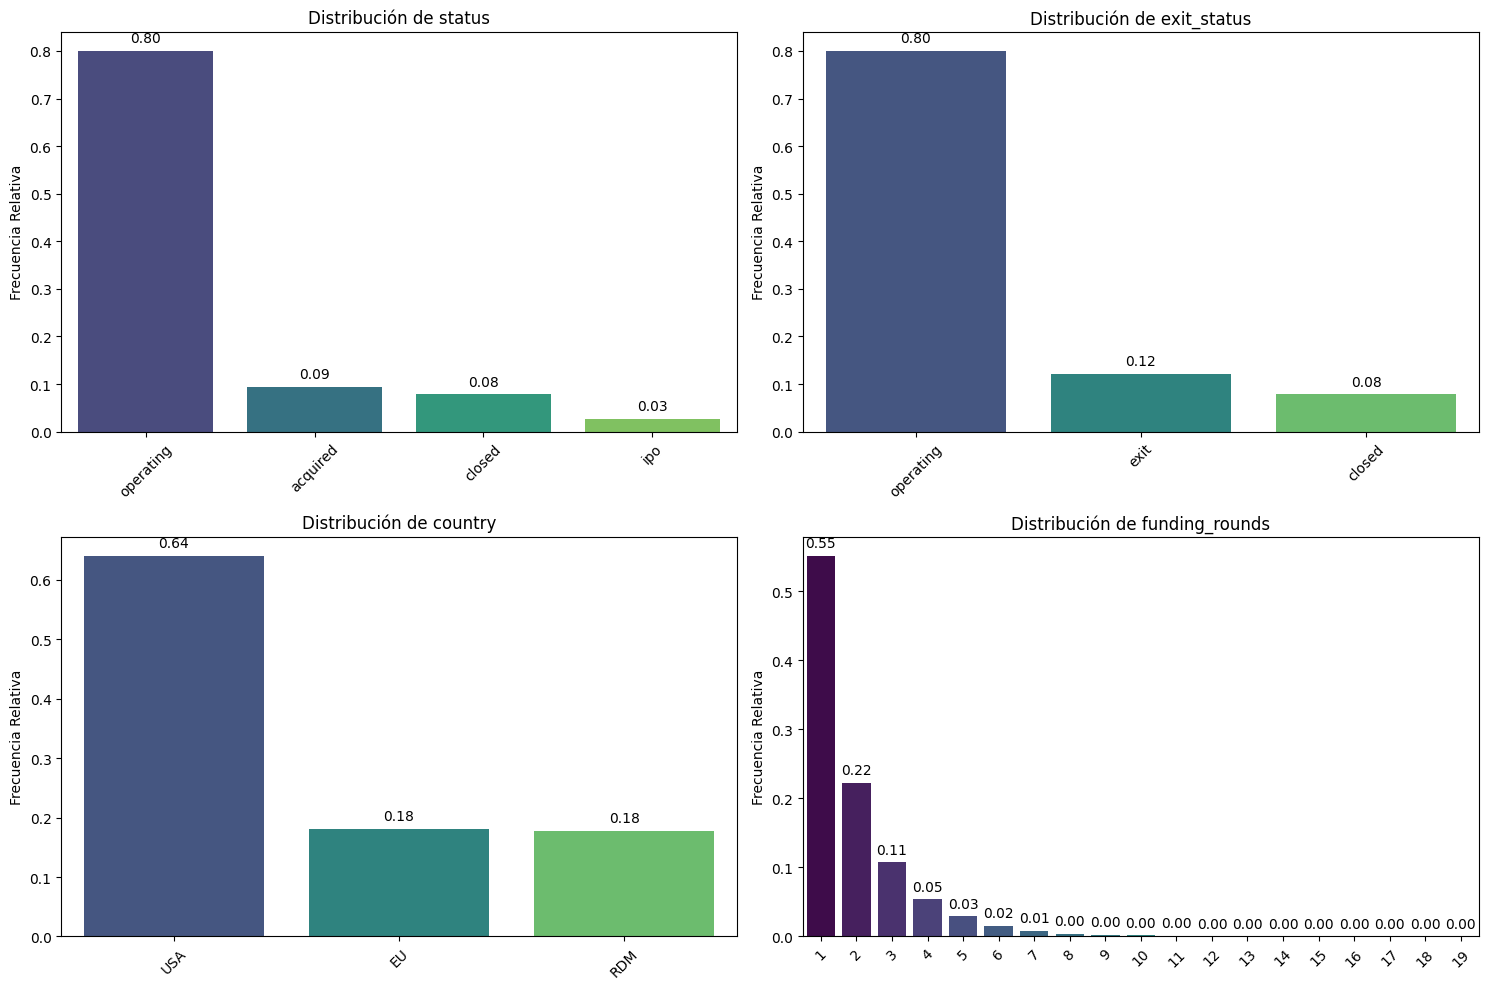

In [56]:
pinta_distribucion_categoricas(df, categoricas, relativa=True, mostrar_valores=True)

ANALISIS VARIABLES CON MUCHAS CATEGORIAS, HACIENDO SLICING

In [57]:
# ANALISIS paises donde mas startup se han creado
print("Numero de paises: ", len(set(df['country_code'])))
print("Paises con mas de 100 startup: ",      
      str(sum(df['country_code'].value_counts() >= 100)))

Numero de paises:  133
Paises con mas de 100 startup:  31


<Axes: ylabel='country_code'>

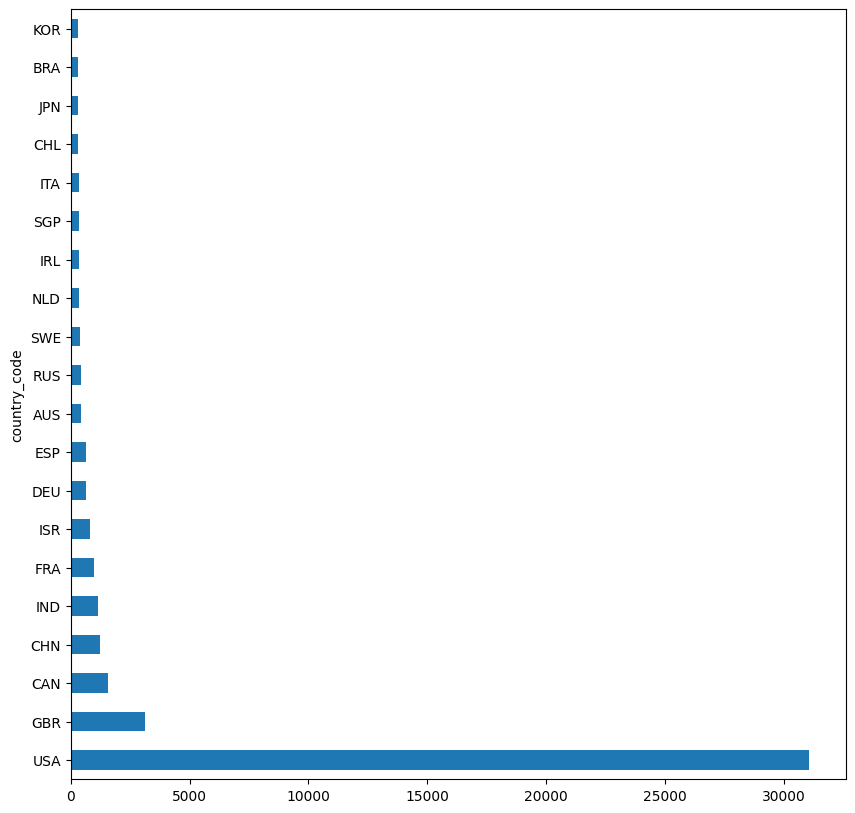

In [58]:
fig, ax = plt.subplots(figsize = (10,10))
df['country_code'].value_counts()[:20].plot(kind='barh')

In [59]:
#ANALISIS sector donde mas startup se han creado## 
print("Numero de sectores: ", len(set(df['sector'])))
print("Sectores con mas de 100 startup: ",      
      str(sum(df['sector'].value_counts() >= 100)))

Numero de sectores:  707
Sectores con mas de 100 startup:  84


In [60]:
#no està bien
sectores_mas_financiados = df.loc[df['sector'].value_counts()[:5], ['sector', 'funding_log']]
main_sectores = sectores_mas_financiados['sector'].to_list()
sectores_mas_financiados
#sectores_mas_financiados.set_index('sector').plot(kind = 'bar')

,sector,funding_log
4057,Ad Targeting,5.698970
3484,Sports,5.579784
2068,Mobile,7.477121
1919,Reviews and Recommendations,4.653213
1633,Biotechnology,6.650793


In [61]:
category_counts = df['sector'].value_counts().head(10)
main_categories = category_counts.index


# Filtrar el dataset para incluir solo las principales categorías y quitando las operating
filtered_sector = df[df['sector'].isin(main_categories)]
#filter_exit = filtered_sector[filtered_sector['exit_status'].isin("ipo", "acquired", "closed")]

exit_fail_status = df['sector'].isin(["exit", "closed"]).index
exit_fail_status

category_counts
main_categories
exit_fail_status

Index([14102, 47159, 10194,  9271, 22968, 15734, 27656, 36083, 58419, 30459,
       ...
       48505, 13784, 13070, 32619, 29840, 16976, 63189, 18297, 32485,  2927],
      dtype='int64', length=48485)

In [62]:
# Crear dataset con varios filtros:
# filtrar 
category_counts = df['sector'].value_counts().head(10)
category_counts
main_categories = category_counts.index

In [71]:
region_counts = df['region_city'].value_counts().head(10)
region_counts
main_region = region_counts.index

In [72]:
filtro = df[(df['sector'].isin(main_categories)) & (df['region_city'].isin(main_region)) & (df['exit_status'].isin(["exit","closed"]))]
filtro

,name,category_list,funding_total_usd,status,country_code,region_city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_at_year,country,sector,funding_log,exit_status
4611,Aspen Technology,Software,100000000.0,ipo,USA,Boston,1,1981-01-01,2003-08-19,2003-08-19,1981,USA,Software,8.000000,exit
27107,ImmunoGen,Biotechnology,26000000.0,ipo,USA,Boston,4,1981-01-01,2011-06-15,2011-12-20,1981,USA,Biotechnology,7.414973,exit
47904,Repligen,Biotechnology,5400000.0,ipo,USA,Boston,2,1981-01-01,2010-12-15,2014-06-18,1981,USA,Biotechnology,6.732394,exit
37834,MYR,Biotechnology,9521365.0,ipo,USA,Chicago,2,1982-01-01,2011-05-12,2014-10-31,1982,USA,Biotechnology,6.978699,exit
10468,Ceon,Software,5040000.0,acquired,USA,SF Bay Area,1,1982-01-01,2005-09-01,2005-09-01,1982,USA,Software,6.702431,exit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44869,Precision Toxicilogy,Analytics|Fitness|Medical,14500000.0,acquired,USA,San Diego,1,2015-04-01,2015-04-01,2015-04-01,2015,USA,Analytics,7.161368,exit
49598,Sarepta Therapeutics,Biotechnology,40000000.0,ipo,USA,Boston,1,2015-06-26,2015-06-26,2015-06-26,2015,USA,Biotechnology,7.602060,exit
21587,Freestyle Software,Software,4975000.0,closed,USA,SF Bay Area,1,2015-07-01,2015-07-01,2015-07-01,2015,USA,Software,6.696793,closed
1375,Adheron Therapeutics,Biotechnology,1500000.0,acquired,USA,SF Bay Area,1,2015-07-31,2015-07-31,2015-07-31,2015,USA,Biotechnology,6.176091,exit


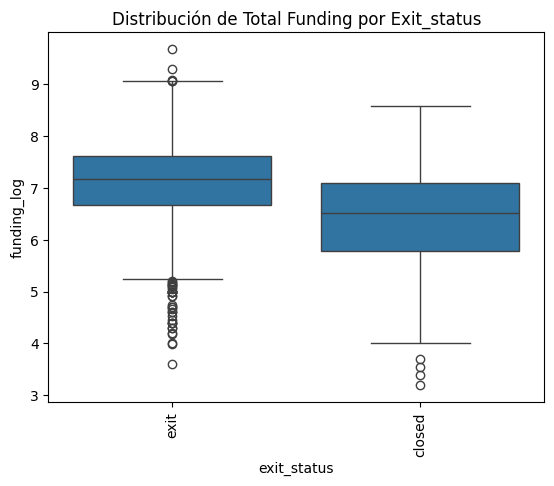

In [65]:
sns.boxplot(x='exit_status', y='funding_log', data=filtro)
plt.title('Distribución de Total Funding por Exit_status')
plt.xticks(rotation=90)
plt.show()


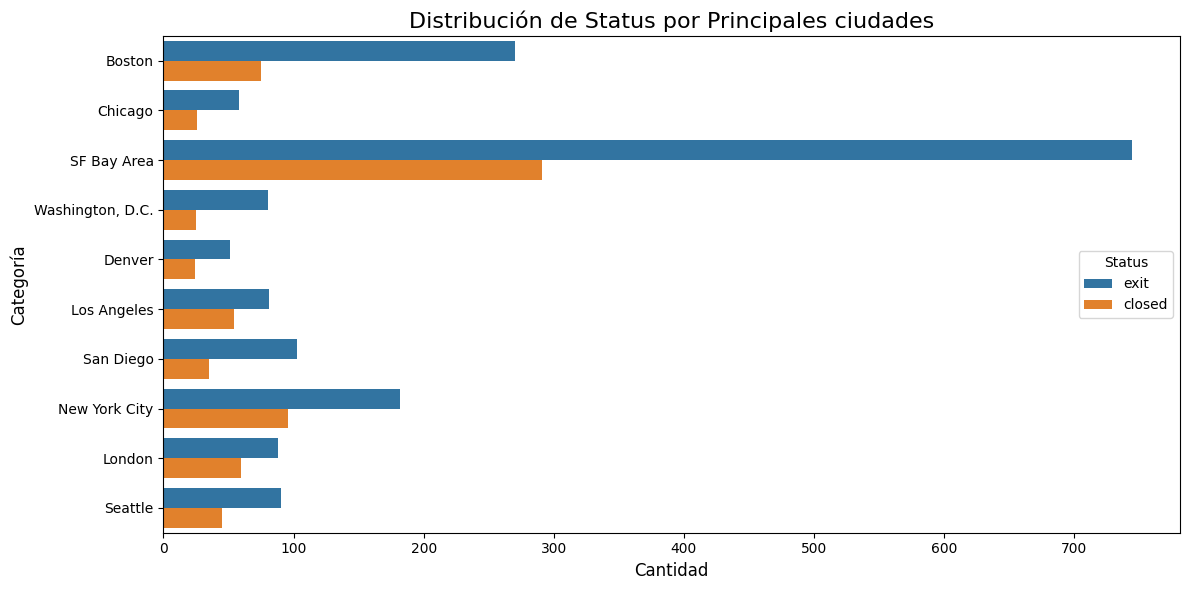

In [66]:
# Crear un gráfico de barras agrupado para 'status' y 'category_list'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtro, y='region_city', hue='exit_status')

# Personalizar el gráfico
plt.title('Distribución de Status por Principales ciudades', fontsize=16, )
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Status', loc='center right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [67]:
#Contar las principales categorías en 'sector'
category_counts = df['sector'].value_counts().head(10)
main_categories = category_counts.index
region_counts = df['region_city'].value_counts().head(10)
main_region = region_counts.index
exit_fail_status = ["ipo", "acquired", "closed"]

# Filtrar el dataset para incluir solo las principales categorías y quitando las operating
filtered_sector = df[df['sector'].isin(main_categories)]
filtered_region = df[df['region_city'].isin(main_region)]
filter_exit = filtered_sector[filtered_sector['exit_status'].isin(["exit", "closed"])]
filtered = filter_exit[filter_exit['region_city']].isin(main_region)
filtered

KeyError: "None of [Index(['Newark', 'Dallas', 'Orange County, California', 'Houston', 'St. Louis',\n       'Tel Aviv', 'Boston', 'Newark', 'Boston', 'Boston',\n       ...\n       'Delta', 'Boston', 'PRI - Other', 'SF Bay Area', 'FL - Other',\n       'Philadelphia', 'SF Bay Area', 'Boston', 'New Delhi', 'Philadelphia'],\n      dtype='object', length=4611)] are in the [columns]"

In [ ]:
# Filtrar el dataset para incluir solo las principales categorías y quitando las operating
filtered_sector = df[df['sector'].isin(main_categories)]
filter_exit = filtered_sector[filtered_sector['exit_status'].isin(["exit", "closed"])]
filtered = filter_exit[filter_exit['region_city']].isin(main_region)
# Crear un gráfico de barras agrupado para 'status' y 'category_list'
plt.figure(figsize=(12, 6))
sns.countplot(data=filtro, y='region_city', hue='exit_status')

# Personalizar el gráfico
plt.title('Distribución de Status por Principales Categorías', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Status', loc='center right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

KeyError: "None of [Index(['Newark', 'Dallas', 'Orange County, California', 'Houston', 'St. Louis',\n       'Tel Aviv', 'Boston', 'Newark', 'Boston', 'Boston',\n       ...\n       'Delta', 'Boston', 'PRI - Other', 'SF Bay Area', 'FL - Other',\n       'Philadelphia', 'SF Bay Area', 'Boston', 'New Delhi', 'Philadelphia'],\n      dtype='object', length=4611)] are in the [columns]"

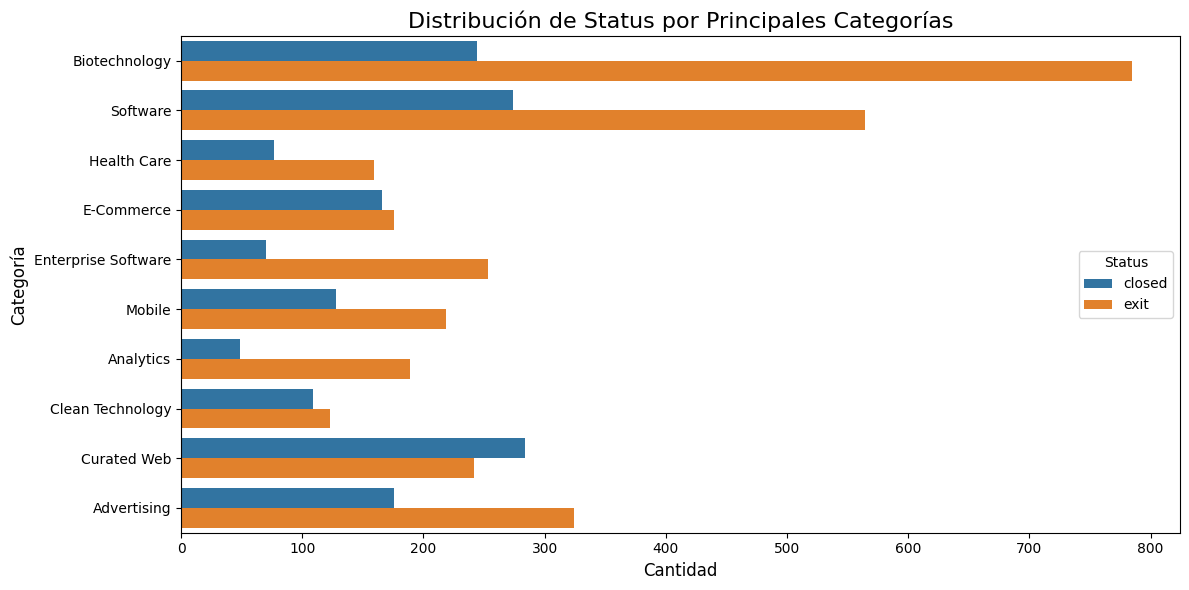

In [ ]:
# Contar las principales categorías en 'sector'
category_counts = df['sector'].value_counts().head(10)
main_categories = category_counts.index
exit_fail_status = ["ipo", "acquired", "closed"]

# Filtrar el dataset para incluir solo las principales categorías y quitando las operating
filtered_sector = df[df['sector'].isin(main_categories)]
filter_exit = filtered_sector[filtered_sector['exit_status'].isin(["exit", "closed"])]

# Crear un gráfico de barras agrupado para 'status' y 'category_list'
plt.figure(figsize=(12, 6))
sns.countplot(data=filter_exit, y='sector', hue='exit_status')

# Personalizar el gráfico
plt.title('Distribución de Status por Principales Categorías', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Status', loc='center right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

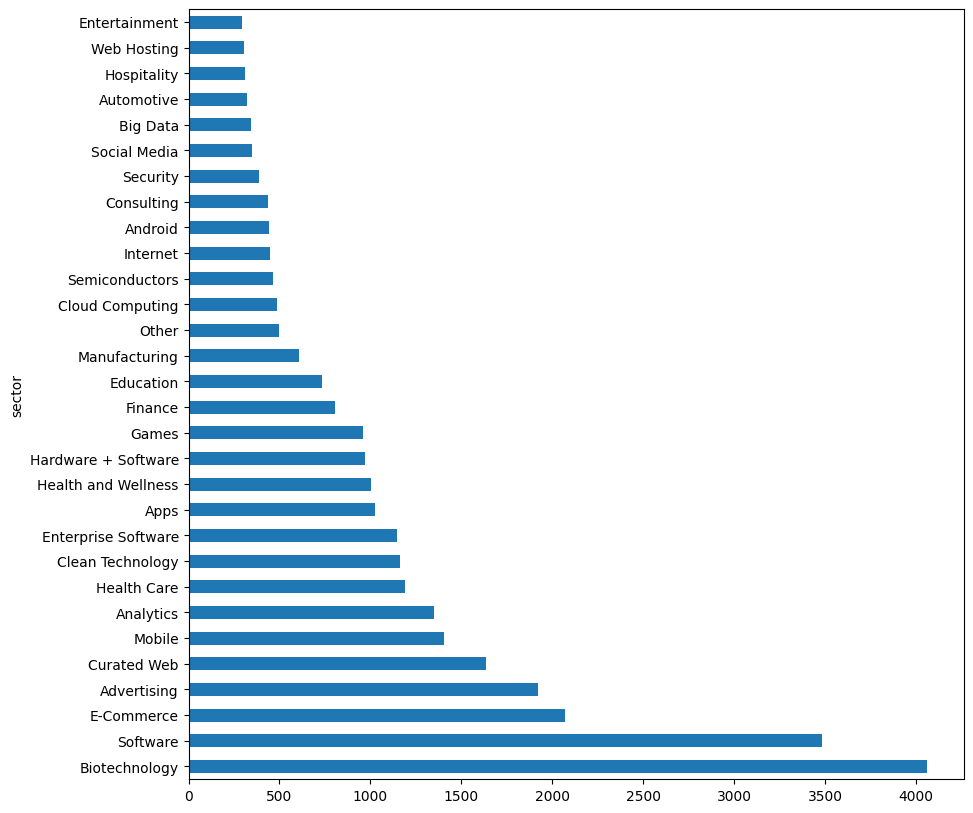

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
df['sector'].value_counts()[:30].plot(kind='barh');

### Analisis Bivariante con variables categóricas

Analizaremos nuestra variable directora: 
 - status - sector
 - status - country y country_code
 - status - year
 - status - funding_rounds

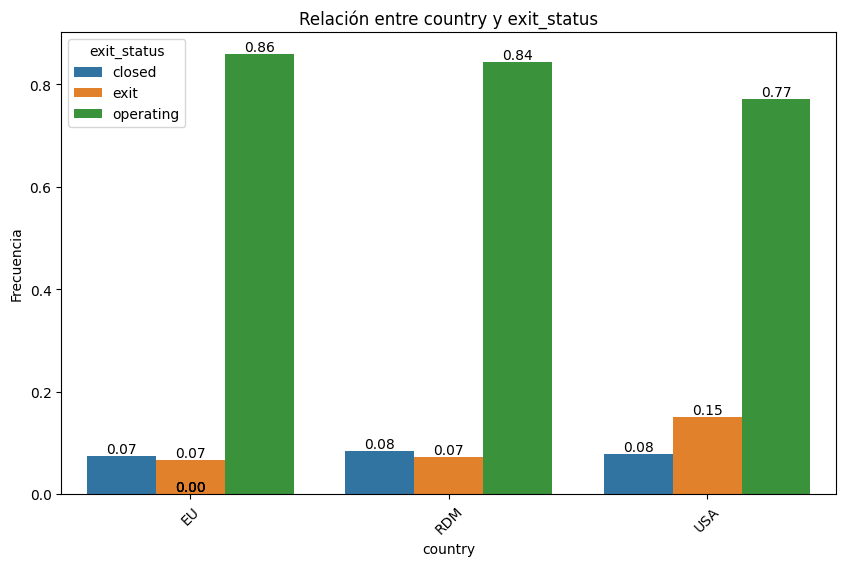

In [73]:
plot_categorical_relationship_fin(df, "country","exit_status", relative_freq=True,show_values= True)


In [ ]:
filtro.region_city.value_counts()

region_city
SF Bay Area         1035
Boston               345
New York City        278
London               148
San Diego            138
Los Angeles          135
Seattle              135
Washington, D.C.     105
Chicago               84
Denver                75
Name: count, dtype: int64

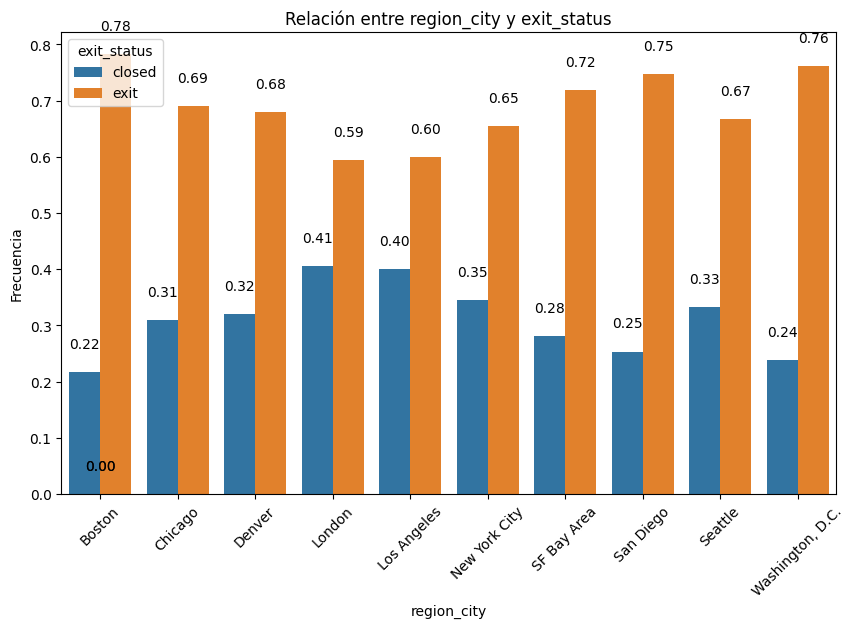

In [74]:

plot_categorical_relationship_fin(filtro, "region_city","exit_status", relative_freq=True, show_values= True, size_group=20)

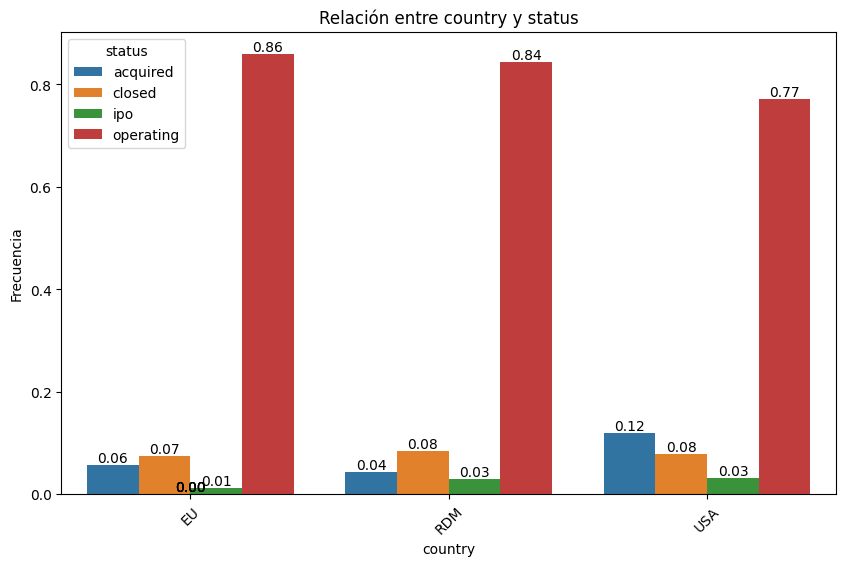

In [75]:
# RELATIVA
plot_categorical_relationship_fin(df, "country", "status",relative_freq = True, show_values = True)

Aplico test Chi2 - aunque habria que evaluarlo porque el dataset rapresenta todas las grandes startups hasta la fecha(2015)

In [76]:
tabla_contingencia_country = pd.crosstab(df['status'], df['country'])

tabla_contingencia_country

country,EU,RDM,USA
status,,,
acquired,497,370,3689
closed,645,722,2436
ipo,94,252,981
operating,7570,7279,23950


In [77]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_country)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 784.1973462063814
P-Value: 3.9965557932945614e-166
Grados de Libertad: 6
Tabla de Frecuencias Esperadas:
 [[  827.47521914   810.27922038  2918.24556048]
 [  690.71296277   676.3590595   2435.92797773]
 [  241.01396308   236.00538311   849.98065381]
 [ 7046.79785501  6900.35633701 24851.84580798]]


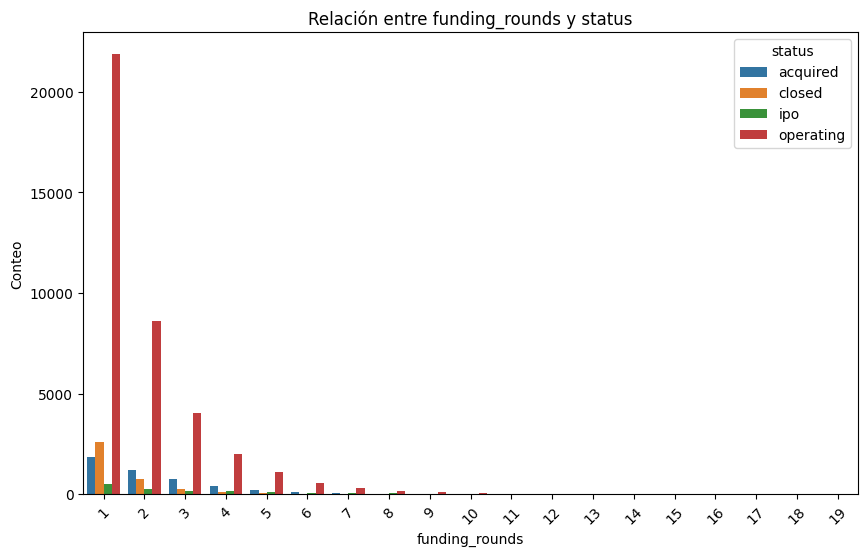

In [78]:
# RELATIVA STATUS FUNDING_ROUNDS
plot_categorical_relationship_fin(df,"funding_rounds","status",  size_group=20)

In [79]:
tabla_contingencia_rounds = pd.crosstab(df['status'], df['funding_rounds'])

tabla_contingencia_rounds

funding_rounds,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
status,,,,,,,,,,,,,,,,,,,
acquired,1823,1186,735,407,185,115,54,14,11,13,9,1,0,0,1,0,1,1,0
closed,2572,744,250,119,51,31,13,13,6,1,2,0,0,1,0,0,0,0,0
ipo,479,247,179,132,96,72,39,36,17,10,9,3,4,1,2,1,0,0,0
operating,21879,8608,4053,1974,1076,536,305,146,90,52,30,22,11,4,3,5,2,2,1


In [80]:
chi2, p, dof, expected = chi2_contingency(tabla_contingencia_rounds)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
#print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1638.9089860215372
P-Value: 1.8855900446219155e-307
Grados de Libertad: 54


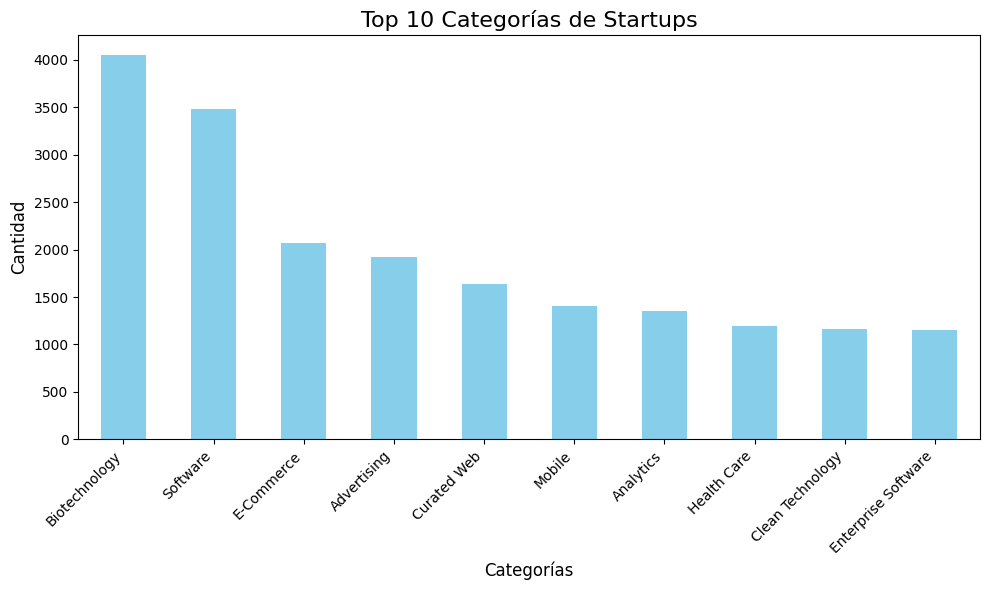

In [81]:
# Principales categorías por cantidad
category_counts = df['sector'].value_counts().head(10)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Startups', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

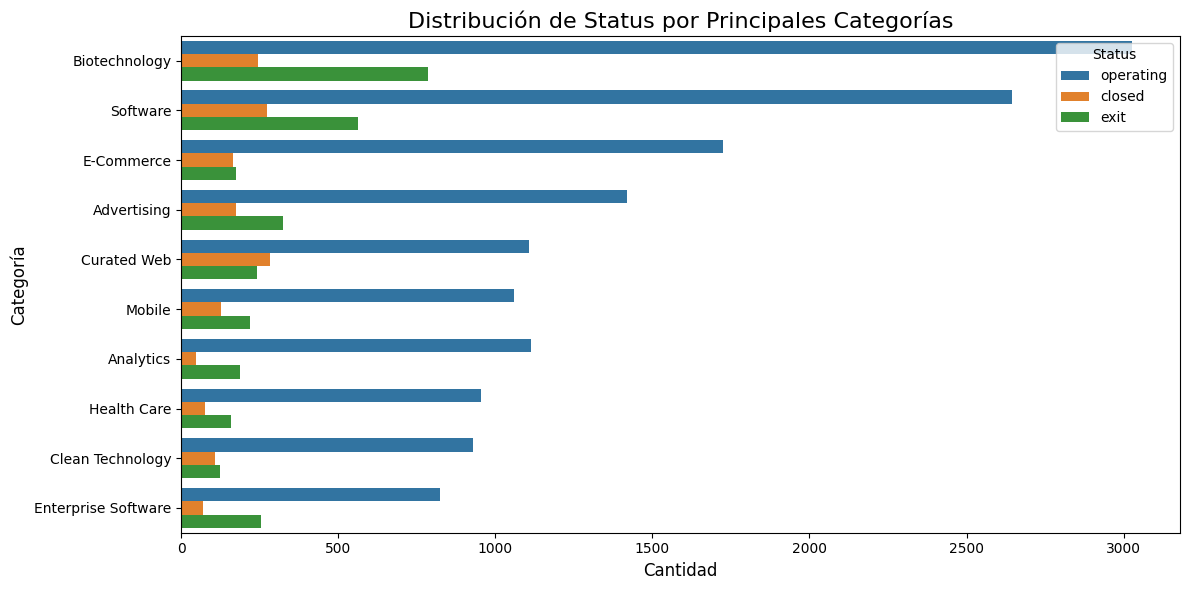

In [82]:
# Crear un gráfico de barras agrupado para 'status' y 'category_list'
main_categories = category_counts.index
filtered_data = df[df['sector'].isin(main_categories)]
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_data, y='sector', hue='exit_status', order=main_categories)
plt.title('Distribución de Status por Principales Categorías', fontsize=16)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Categoría', fontsize=12)
plt.legend(title='Status', loc='upper right')
plt.tight_layout()
plt.show()

## VARIABLES NUMERICAS

In [83]:
df.describe().loc[["mean","50%", "25%", "75%", "std"]].T

,mean,50%,25%,75%,std
funding_total_usd,17530423.204442,2100000.0,400000.0,10494514.0,101859097.709499
funding_rounds,1.937548,1.0,1.0,2.0,1.499628
founded_at,2008-11-25 03:14:08.897597184,2010-08-01 00:00:00,2006-08-01 00:00:00,2012-12-18 00:00:00,NaN
first_funding_at,2011-05-16 14:09:01.874806784,2012-04-01 00:00:00,2009-07-06 00:00:00,2014-02-01 00:00:00,NaN
last_funding_at,2012-07-27 23:39:17.949881600,2013-09-01 00:00:00,2011-01-25 00:00:00,2014-11-29 00:00:00,NaN
founded_at_year,2008.641394,2010.0,2006.0,2012.0,5.455254
funding_log,6.277863,6.322219,5.60206,7.020962,1.022705


In [84]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [85]:
#Calculo IQR Indice
IQR = get_IQR(df,"funding_log")
IQR

np.float64(1.418902339917719)

In [ ]:
# #OUTLIERS funding total
# std_deviation = 1.5
# mean = df['funding_log'].mean()
# std = df['funding_log'].std()
# max = df['funding_log'].max()
# min = df['funding_log'].quantile(.75)
# print(mean, std, std_deviation, IQR, min, max)
# limite_sup = mean + (std_deviation * std)
# limite_inf = mean - (std_deviation * std)
# df1 = df[(df['funding_log'] >= limite_inf) & (df['funding_log'] <= limite_sup)]
# df1.info()


* Si el IQR es mucho mayor que la mediana (por ejemplo más de un 50%) podríamos pensar en una variable con valores bastante dispersos (y por tanto las medidas de tendencia central hay que considerarlas con más cuidado)
* Podemos comparar el IQR con el rango (la diferencia entre valor máximo y mínimo) y si el IQR es comparable entonces de nuevo podremos hablar de una variable dispersa.

In [ ]:
#Calculo Variabiidad
def variabilidad(df):
    df_var = df.describe().loc[["std","mean"]].T
    #llamo al describe y 
    # creo una nueva columna con el coef de Variacion =std/mean
    df_var["Coef_Var"] = df_var["std"]/df_var["mean"]
    return df_var

In [ ]:
variabilidad(df)

,std,mean,Coef_Var
funding_total_usd,101859097.709499,17530423.204442,5.810419
funding_rounds,1.499628,1.937548,0.773982
founded_at,NaN,2008-11-25 03:14:08.897597184,NaN
first_funding_at,NaN,2011-05-16 14:09:01.874806784,NaN
last_funding_at,NaN,2012-07-27 23:39:17.949881600,NaN
founded_at_year,5.455254,2008.641394,0.002716
funding_log,1.022705,6.277863,0.162907


(2,)


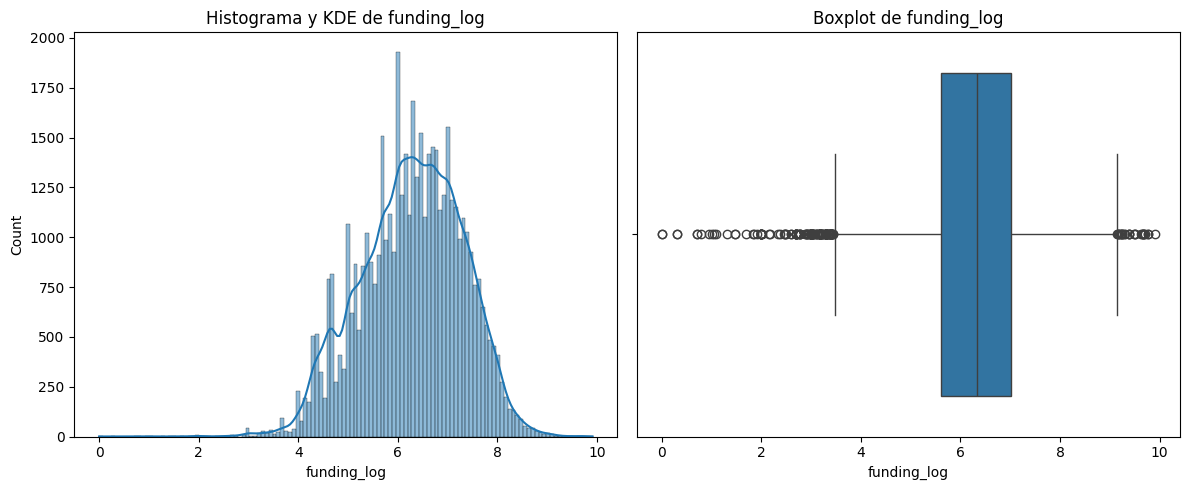

In [86]:
plot_combined_graphs(df, ["funding_log"], whisker_width= 1.5)

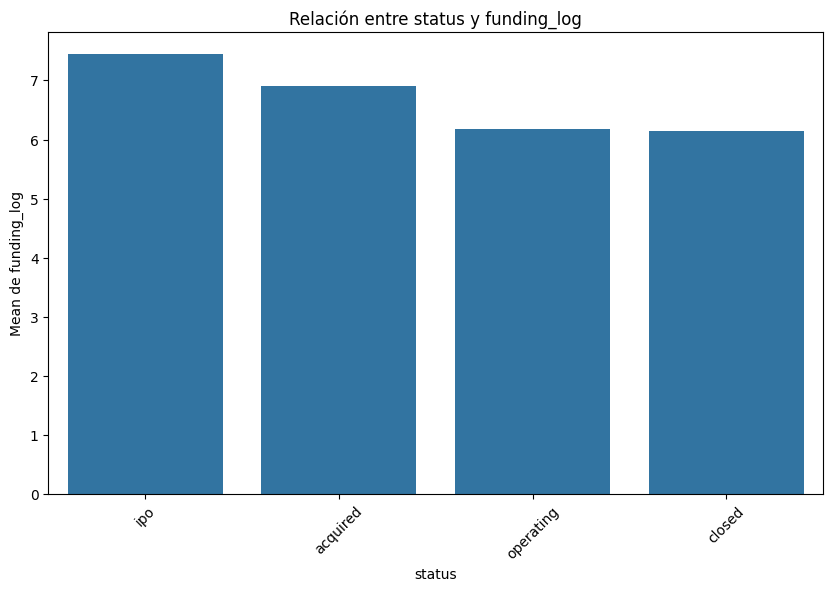

In [87]:
plot_categorical_numerical_relationship(df,"status","funding_log", measure = "mean")

In [88]:
#groupby status y analissi descriptivo de funding
df.groupby('status')['funding_log'].describe() /len(df) * 100


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,9.396721,0.014233,0.001564,0.006551,0.013356,0.014437,0.015327,0.020140
closed,7.843663,0.012660,0.002107,0.000621,0.011133,0.012738,0.014238,0.018965
ipo,2.736929,0.015350,0.001586,0.007429,0.014426,0.015479,0.016453,0.020137
operating,80.022687,0.012743,0.002076,0.000000,0.011297,0.012822,0.014238,0.020448


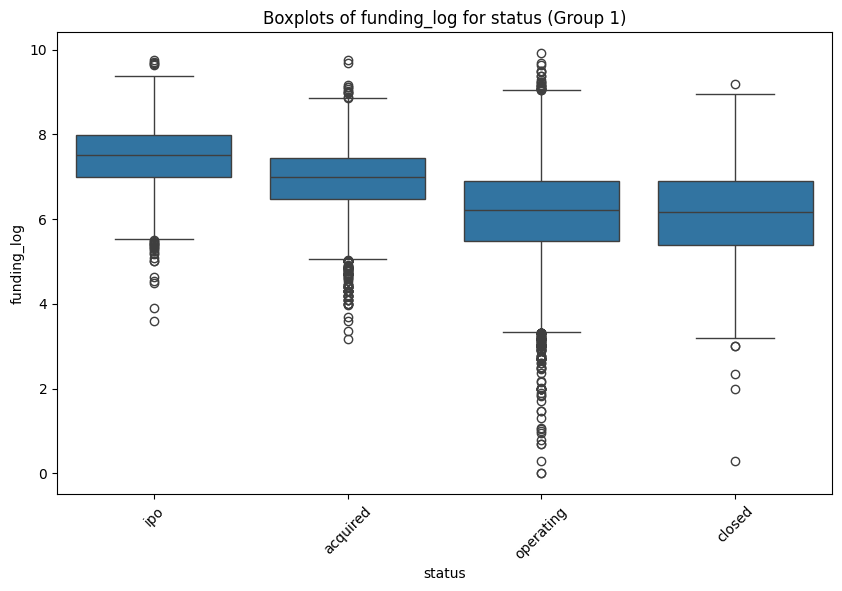

In [89]:
plot_grouped_boxplots(df,"status","funding_log")

Las startups que reciben mas financiacion tiene mas probabilidad de exito : es decir de salir a bolsa (IPO: Initial Public Offering - Oferta pública de acciones) o ser adquiridos por privados

Tambien tienen mas rondas de financiacion

Parece ser que hay uan relacion entre ronda de financiacion y exito y entre financiacion total y exito, como esperado

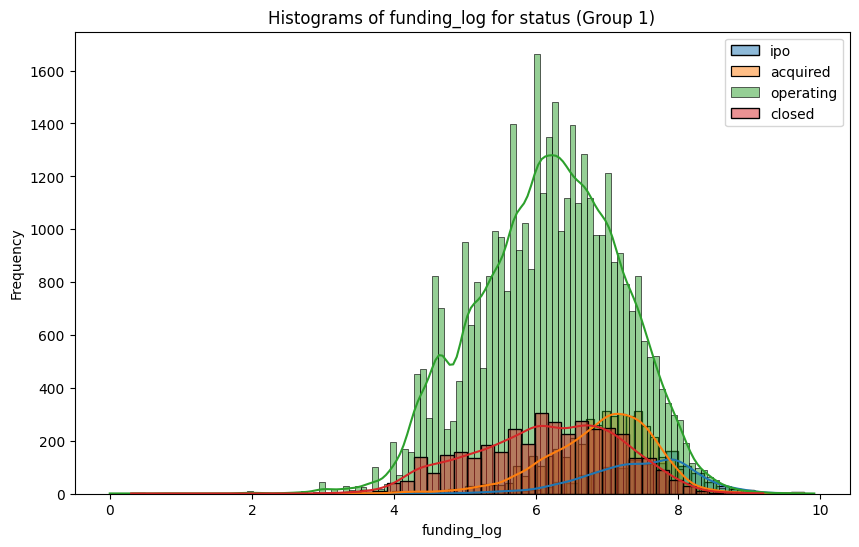

In [90]:
plot_grouped_histograms(df,"status", "funding_log", 5)

In [ ]:
# Obtener los valores únicos de la columna categórica
grupo_status = df['status'].unique()  
print(grupo_status)
# obtenemos los funding_for_status y los incluimos en una lista
funding_for_status = [df[df['status'] == grupo]['funding_log'] for grupo in grupo_status] 

#funding_for_status

['ipo' 'acquired' 'operating' 'closed']


In [ ]:
f_val, p_val = stats.f_oneway(*funding_for_status) 

print("Valor F:", f_val)
print("Valor p:", p_val)


Valor F: 1392.3893923411808
Valor p: 0.0


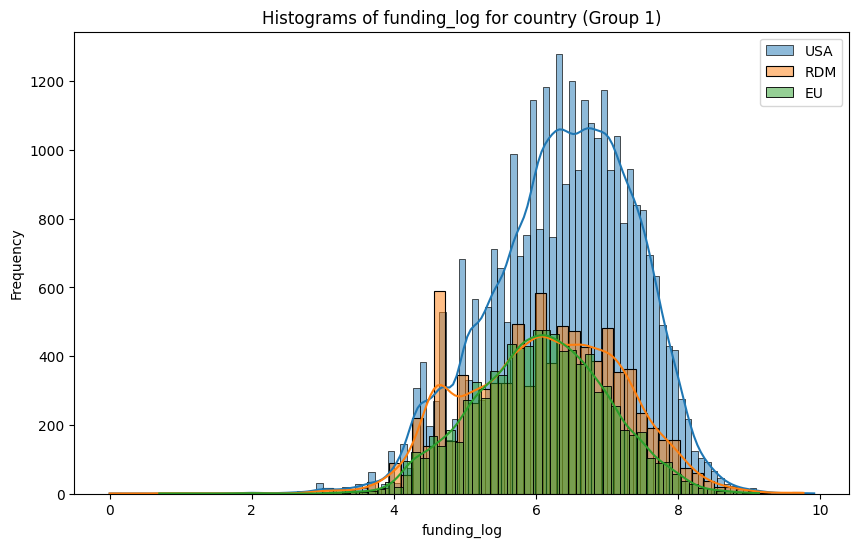

In [91]:
plot_grouped_histograms(df,"country", "funding_log", 5)

In [ ]:
# Obtener los valores únicos de la columna categórica
grupo_country = df['country'].unique()  
print(grupo_country)
# obtenemos los funding_for_status y los incluimos en una lista
country_funding = [df[df['country'] == grupo]['funding_log'] for grupo in grupo_country] 

#country_funding

['USA' 'RDM' 'EU']


In [ ]:
f_val, p_val = stats.f_oneway(*country_funding) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 475.7967924769314
Valor p: 2.3218219357172128e-205


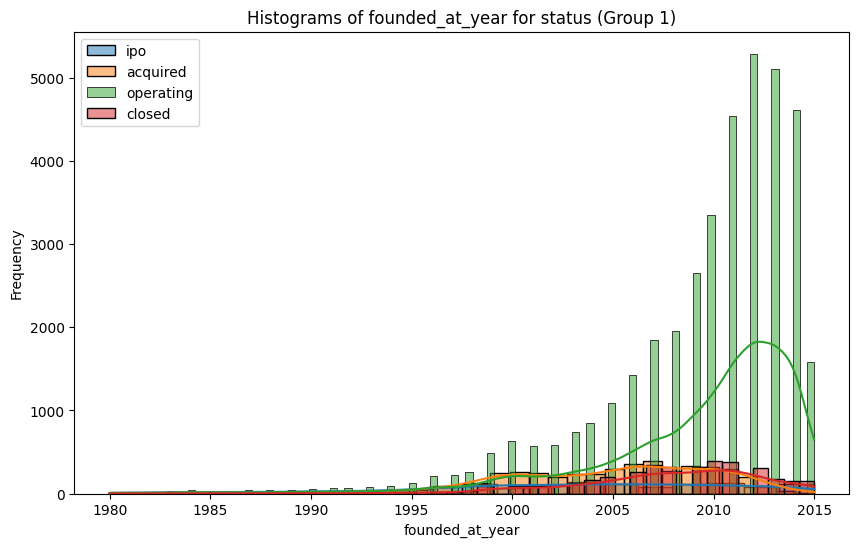

In [92]:
plot_grouped_histograms(df,"status", "founded_at_year", 5)

In [ ]:
# Obtener los valores únicos de la columna categórica
grupo_status_y = df['status'].unique()  
print(grupo_status_y)
# obtenemos los funding_for_status y los incluimos en una lista
year_status = [df[df['status'] == grupo]['founded_at_year'] for grupo in grupo_status_y] 

#year_status

['ipo' 'acquired' 'operating' 'closed']


In [ ]:
f_val, p_val = stats.f_oneway(*year_status) 

print("Valor F:", f_val)
print("Valor p:", p_val)

Valor F: 1704.5554309061574
Valor p: 0.0


In [ ]:
# p-value =0, hay evidencia estadisticas que hay relacion entre status y cantidad de financiacion 
# y entre status y año de creacion
# tambien hay evidencia est de relacion entre country y financiacion recibida

Percentiles y BoxPlots

In [94]:
numericas = ["funding_log", "founded_at_year"]

In [95]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

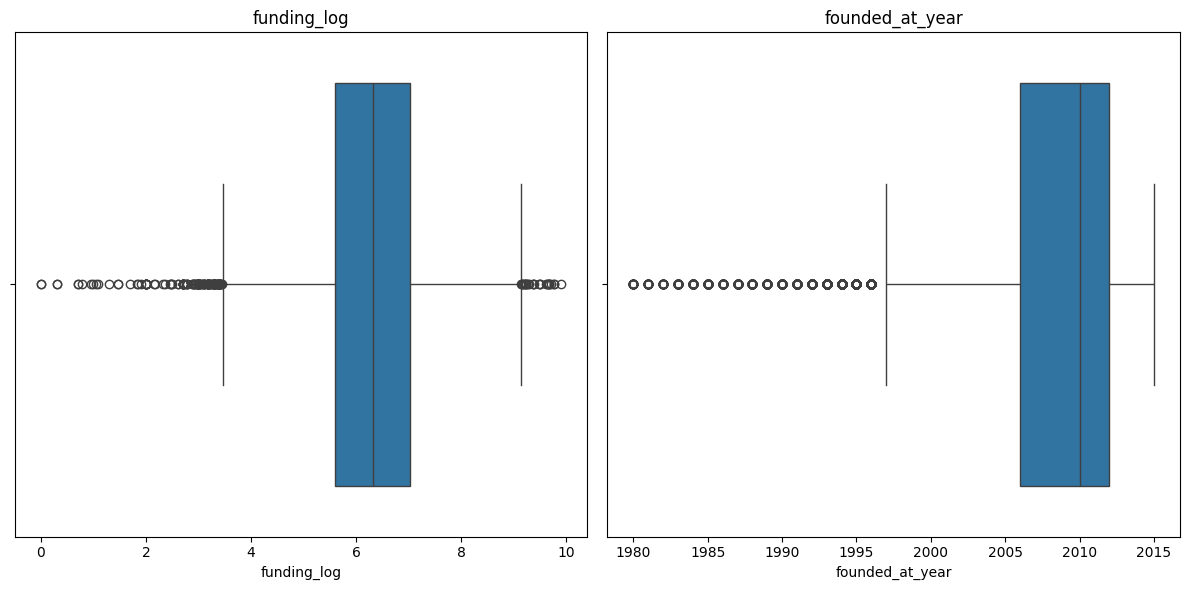

In [ ]:
plot_multiple_boxplots(df, numericas)

VEDERE GLI OUTLIERS
1. Analizar la variable filtrando los valores extremos.
2. En cualquier caso, parece interesante crearse una nueva variable categórica ordinal (con el *binning* que vimos en su momento) y emplearla para hacer una análisis más detallado por funding_total_usd (recuerda que es nuestra variable directora)


* Mantenerlos 
* Elimiar si son valores erróneos 
* Eliminarlos directamente, indicando que se ha hecho -Marcandolo en una columna - como hecho con los missing-
* Aplicar transformaciones (se verá en feature engineering). 
* Discretizar la variable - hacer un bin y categorizarlas como outlier para leugo estudiarla
* Imputar el valor por otro nuevo (como los missings) 
* Tratar por separado 

In [ ]:
# #outliers
# q_outlier = df['funding_total_usd'].quantile(0.75) +1.5 * IQR 
# es_outlier_funding_total = df[df['funding_total_usd'] > q_outlier ]
# print(q_outlier, len(es_outlier_funding_total))
# es_outlier_funding_total

# df = df[df['funding_total_usd'] < q_outlier ]
# df

In [ ]:
#plot_histo_dens(df, numericas, bins= 20)

In [ ]:
# plot_combined_graphs(df, numericas, whisker_width=2, bins = 40)

In [ ]:
# mostrar_diagramas_violin(df, ["status"])

In [ ]:
# startups_data['funding_total_usd'] = (
#     startups_data['funding_total_usd']
#     .replace('-', pd.NA)
#     .astype(float)

In [ ]:
df.to_csv('df_startup_clean.csv', index=False)

In [ ]:
filtro.to_csv('dataset_filtrado.csv', index=False)

In [ ]:
df.sector.unique()

array(['Public Transportation', 'Broadcasting', 'E-Commerce', 'Mobile',
       'EdTech', 'Hardware + Software', 'Insurance', 'Biotechnology',
       'Travel', 'Web Hosting', 'Manufacturing', 'Enterprise Software',
       'Human Resources', 'Software', 'Other', 'Health and Wellness',
       'Electrical Distribution', 'Automotive', 'Health Care',
       'Real Estate', 'Information Technology', 'Semiconductors',
       'Fitness', 'Finance', 'Clean Technology',
       'Health Care Information Technology', 'Consulting', 'Medical',
       'Aerospace', 'Financial Services', 'Analytics', 'Entertainment',
       'Jewelry', 'Banking', 'Venture Capital', 'Non Profit',
       'Industrial', 'Accounting', 'Computers', 'Hospitality',
       'Infrastructure', 'Fleet Management', 'Advertising', 'Education',
       'Public Relations', 'Energy', 'Security',
       'Private Social Networking', 'Business Services', 'Sports', 'Apps',
       'Hardware', 'Lifestyle Businesses', 'Construction', 'Curated Web',


In [96]:
tabla_contingencia_country = pd.crosstab(df['region_city'], df['status'])
tabla_contingencia_country

status,acquired,closed,ipo,operating
region_city,,,,
A Coruna,0,0,0,4
AB - Other,0,0,0,4
AK - Other,0,0,0,3
AL - Other,0,2,0,9
AR - Other,0,0,0,6
...,...,...,...,...
Zhuhai,0,0,0,5
Zurich,4,2,3,82
[],0,0,0,5


ANALISIS MULTIVARIANTE : Análisis status - sector - country

variable target : status
en el bivariante 

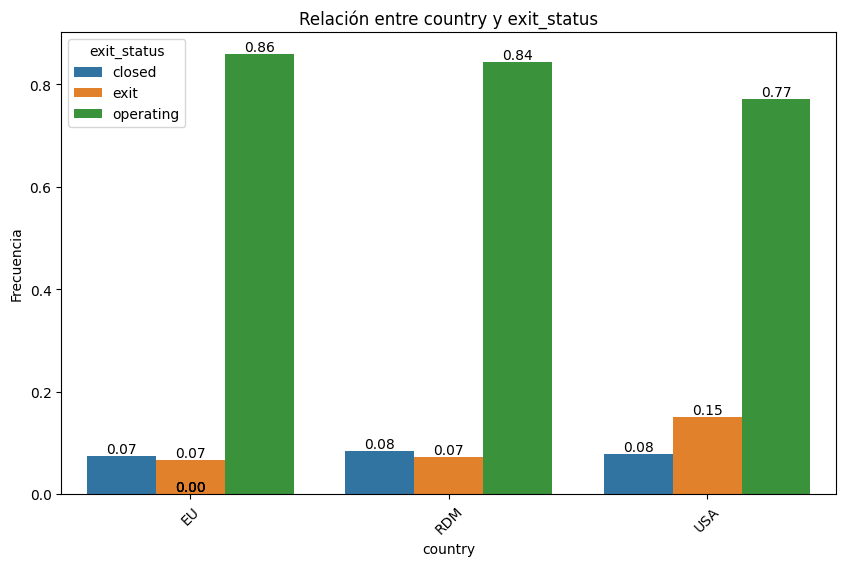

In [99]:
plot_categorical_relationship_fin(df,"country","exit_status", relative_freq= True, show_values= True)

In [ ]:
# plot_categorical_relationship_fin(df,"sector","exit_status", relative_freq= True, show_values= True, size_group=30)

In [ ]:
# plot_categorical_relationship_fin(df,"sector","country", relative_freq= True, show_values= True)

In [119]:
columnas = ["exit_status","country","sector"] 
col_directora = "exit_status"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante_exit = {}
diccionario_multivariante_closed = {}
diccionario_multivariante_operating = {}
for valor in df[col_directora].unique():
    if valor == "exit":
        diccionario_multivariante_exit[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]
    elif valor =="closed":
        diccionario_multivariante_closed[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]
    else :
        diccionario_multivariante_operating[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]]

    # Ojo al orden quiero ver para cada oferta como es la distribución de educacion


diccionario_multivariante_exit
diccionario_multivariante_closed


{'closed':                         sector country
 60436            Biotechnology     USA
 17776  Electrical Distribution     RDM
 35748               Automotive     RDM
 56314            Biotechnology     USA
 12596      Hardware + Software     USA
 ...                        ...     ...
 40705                    Other      EU
 32282                    Other     RDM
 32571                    Other      EU
 13784                    Other     USA
 32619                    Other     USA
 
 [3803 rows x 2 columns]}

In [129]:
for valor,df_datos_exit in diccionario_multivariante_exit.items():
    print(f"Respuesta {valor}:")
    print(df_datos_exit)
    #plot_categorical_relationship_fin(df_datos_exit,col_1,col_2, relative_freq= True)

Respuesta exit:
                      sector country
14102  Public Transportation     USA
47159           Broadcasting     USA
12753        Human Resources     USA
14565               Software     USA
12671                  Other      EU
...                      ...     ...
36712              Consumers     RDM
35029     Health Diagnostics     RDM
57821              Bio-Pharm     USA
10227               Software     USA
37868               Internet     RDM

[5883 rows x 2 columns]


In [113]:
df_datos_exit

,sector,country
14102,Public Transportation,USA
47159,Broadcasting,USA
12753,Human Resources,USA
14565,Software,USA
12671,Other,EU
...,...,...
36712,Consumers,RDM
35029,Health Diagnostics,RDM
57821,Bio-Pharm,USA
10227,Software,USA


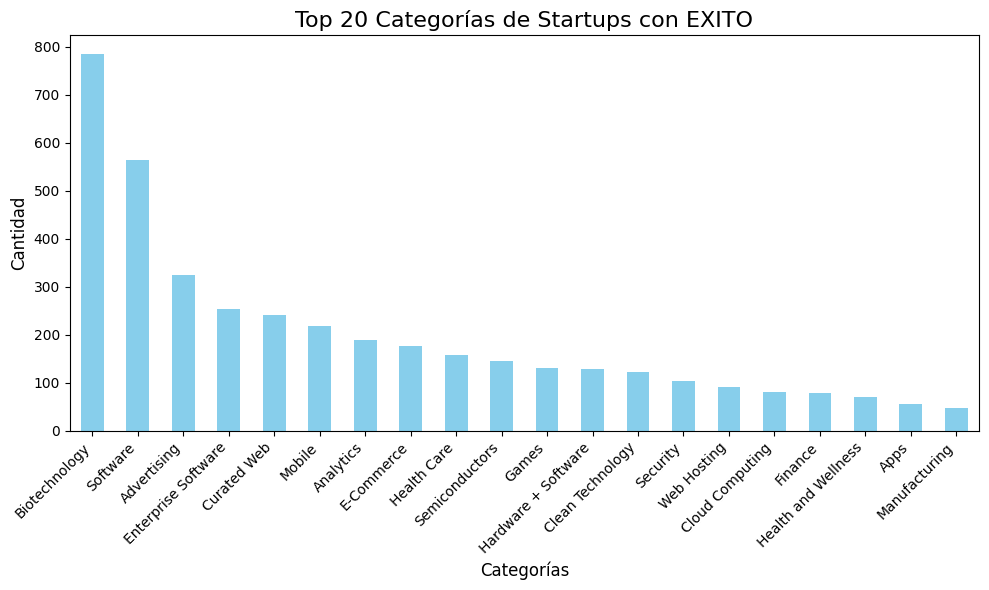

In [125]:
category_counts = df_datos_exit['sector'].value_counts().head(20)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Top 20 Categorías de Startups con EXITO', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [136]:
category_counts

sector
Curated Web            284
Software               274
Biotechnology          244
Advertising            176
E-Commerce             166
Other                  137
Mobile                 128
Clean Technology       109
Games                  101
Health Care             77
Hardware + Software     74
Finance                 73
Enterprise Software     70
Apps                    58
Social Media            50
Analytics               49
Semiconductors          43
Internet                41
Android                 38
Health and Wellness     38
Name: count, dtype: int64

In [146]:
df_datos_exit.head(50)

,sector,country
14102,Public Transportation,USA
47159,Broadcasting,USA
12753,Human Resources,USA
14565,Software,USA
12671,Other,EU
22888,Manufacturing,USA
17555,Hardware + Software,USA
36774,Health Care,USA
7815,Software,USA
42126,E-Commerce,USA


C:\Users\PC\AppData\Local\Temp\ipykernel_13332\2042007946.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df_datos_exit[df['sector'].isin(top_sectors)]


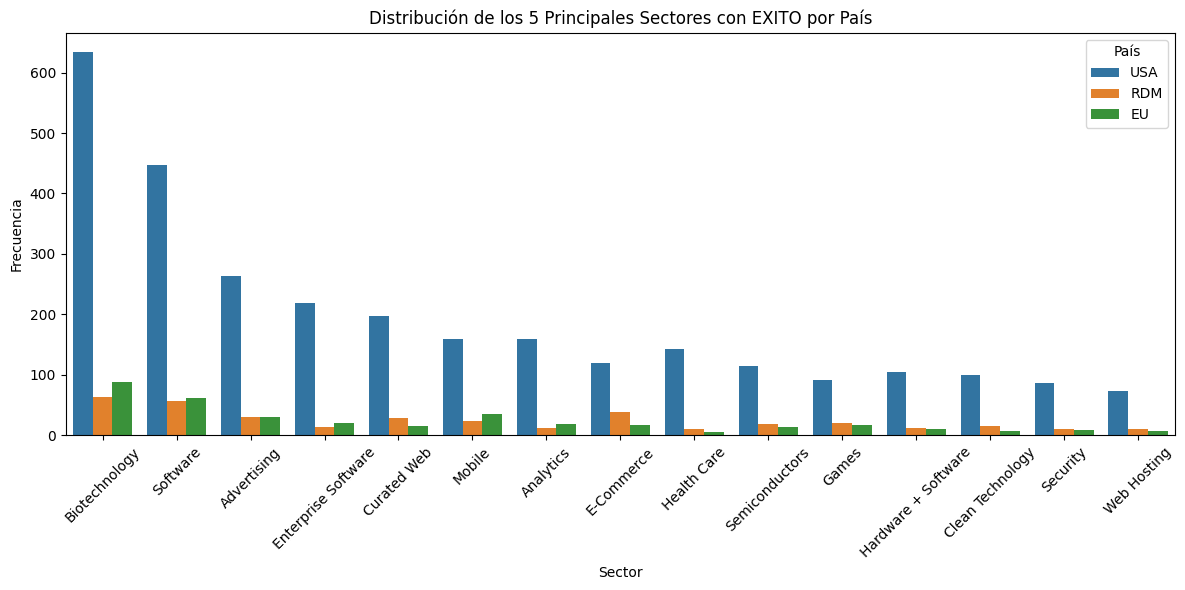

In [150]:
# Identificar los 15 sectores más frecuentes
top_sectors = df_datos_exit['sector'].value_counts().nlargest(15).index
filtered_df = df_datos_exit[df['sector'].isin(top_sectors)]

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='sector', hue='country', order=top_sectors)
plt.title("Distribución de los 15 Principales Sectores con EXITO por País")
plt.xlabel("Sector")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.legend(title="País")
plt.tight_layout()
plt.show()

In [120]:
for valor,df_datos_fail in diccionario_multivariante_closed.items():
    print(f"Respuesta {valor}:")
    print(df_datos_fail)

Respuesta closed:
                        sector country
60436            Biotechnology     USA
17776  Electrical Distribution     RDM
35748               Automotive     RDM
56314            Biotechnology     USA
12596      Hardware + Software     USA
...                        ...     ...
40705                    Other      EU
32282                    Other     RDM
32571                    Other      EU
13784                    Other     USA
32619                    Other     USA

[3803 rows x 2 columns]


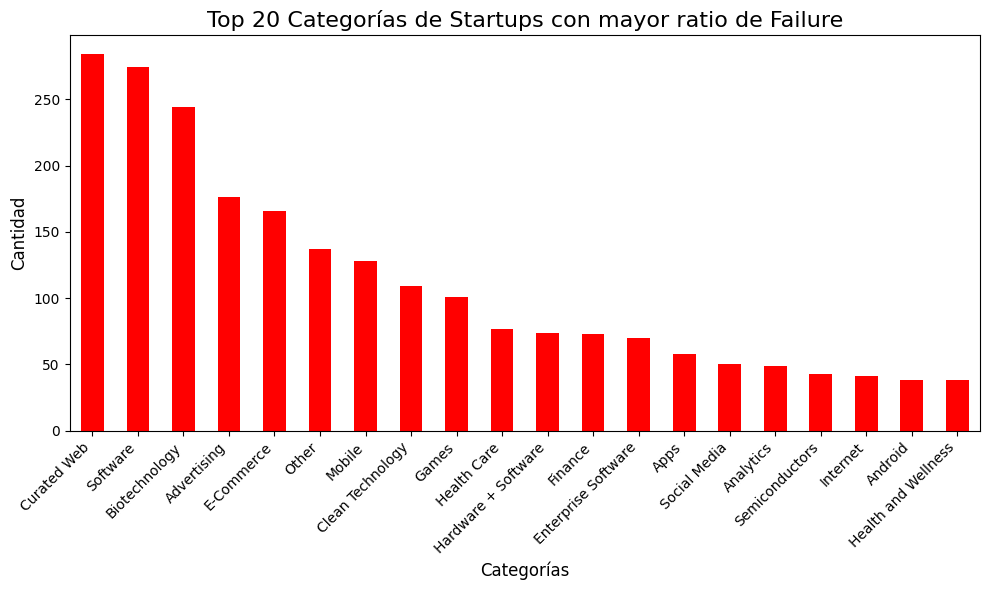

In [126]:
category_counts = df_datos_fail['sector'].value_counts().head(20)
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='red')
plt.title('Top 20 Categorías de Startups con mayor ratio de Failure', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
columnas = ["exit_status","country","sector"] 
col_directora = "exit_status"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
diccionario_multivariante = {}
for valor in df[col_directora].unique():
    diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 
    # Ojo al orden quiero ver para cada oferta como es la distribución de educacion


diccionario_multivariante

In [ ]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= True, show_values= True)

In [155]:
columnas = ["exit_status","country","sector", "country_code", "funding_log", "funding_rounds" ] 
col_directora = "exit_status"
col_1 = [col for col in columnas if col != col_directora][0]
col_2 = [col for col in columnas if col != col_directora][1]
col_3 = [col for col in columnas if col != col_directora][2]
col_4 = [col for col in columnas if col != col_directora][3]
col_5 = [col for col in columnas if col != col_directora][4]
#col_6 = [col for col in columnas if col != col_directora][5]
diccionario_multivariante_exit = {}
diccionario_multivariante_closed = {}
diccionario_multivariante_operating = {}
for valor in df[col_directora].unique():
    if valor == "exit":
        diccionario_multivariante_exit[valor] = df.loc[df[col_directora] == valor,[col_2,col_1,col_3,col_4,col_5]]
    elif valor =="closed":
        diccionario_multivariante_closed[valor] = df.loc[df[col_directora] == valor,[col_2,col_1,col_3,col_4,col_5]]
    else :
        diccionario_multivariante_operating[valor] = df.loc[df[col_directora] == valor,[col_2,col_1,col_3,col_4,col_5]]

    # Ojo al orden quiero ver para cada oferta como es la distribución de educacion


diccionario_multivariante_exit
diccionario_multivariante_closed

{'closed':                         sector country country_code  funding_log  \
 60436            Biotechnology     USA          USA     7.576917   
 17776  Electrical Distribution     RDM          BRA     7.214670   
 35748               Automotive     RDM          BRA     5.677607   
 56314            Biotechnology     USA          USA     6.763451   
 12596      Hardware + Software     USA          USA     7.179331   
 ...                        ...     ...          ...          ...   
 40705                    Other      EU          GBR     6.578916   
 32282                    Other     RDM          JPN     6.342423   
 32571                    Other      EU          SWE     5.602060   
 13784                    Other     USA          USA     6.713910   
 32619                    Other     USA          USA     6.301030   
 
        funding_rounds  
 60436               4  
 17776               1  
 35748               1  
 56314               4  
 12596               7  
 ...      

In [161]:
# df STARTUPS_EXIT
for valor,startups_exit in diccionario_multivariante_exit.items():
    print(f"Respuesta {valor}:")
    print(startups_exit)

Respuesta exit:
                      sector country country_code  funding_log  funding_rounds
14102  Public Transportation     USA          USA     8.477121               1
47159           Broadcasting     USA          USA     7.857332               3
12753        Human Resources     USA          USA     7.301030               1
14565               Software     USA          USA     6.602060               1
12671                  Other      EU          GBR     6.477121               1
...                      ...     ...          ...          ...             ...
36712              Consumers     RDM          CAN     8.301030               1
35029     Health Diagnostics     RDM          CAN     6.577906               1
57821              Bio-Pharm     USA          USA     7.740363               1
10227               Software     USA          USA     8.176091               1
37868               Internet     RDM          ISR     6.602060               1

[5883 rows x 5 columns]


In [156]:
# df STARTUPS_FAIL
for valor,startups_fail in diccionario_multivariante_closed.items():
    print(f"Respuesta {valor}:")
    print(startups_fail)

Respuesta closed:
                        sector country country_code  funding_log  \
60436            Biotechnology     USA          USA     7.576917   
17776  Electrical Distribution     RDM          BRA     7.214670   
35748               Automotive     RDM          BRA     5.677607   
56314            Biotechnology     USA          USA     6.763451   
12596      Hardware + Software     USA          USA     7.179331   
...                        ...     ...          ...          ...   
40705                    Other      EU          GBR     6.578916   
32282                    Other     RDM          JPN     6.342423   
32571                    Other      EU          SWE     5.602060   
13784                    Other     USA          USA     6.713910   
32619                    Other     USA          USA     6.301030   

       funding_rounds  
60436               4  
17776               1  
35748               1  
56314               4  
12596               7  
...               ...

In [157]:
# Identifico los 15 sectores más frecuentes
top_sectors_fail = startups_fail['sector'].value_counts().nlargest(15)
top_sectors_fail_i = startups_fail['sector'].value_counts().nlargest(15).index
filtered_df_fail = startups_fail[df['sector'].isin(top_sectors_fail_i)]


C:\Users\PC\AppData\Local\Temp\ipykernel_13332\1262724608.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df_fail = startups_fail[df['sector'].isin(top_sectors_fail_i)]


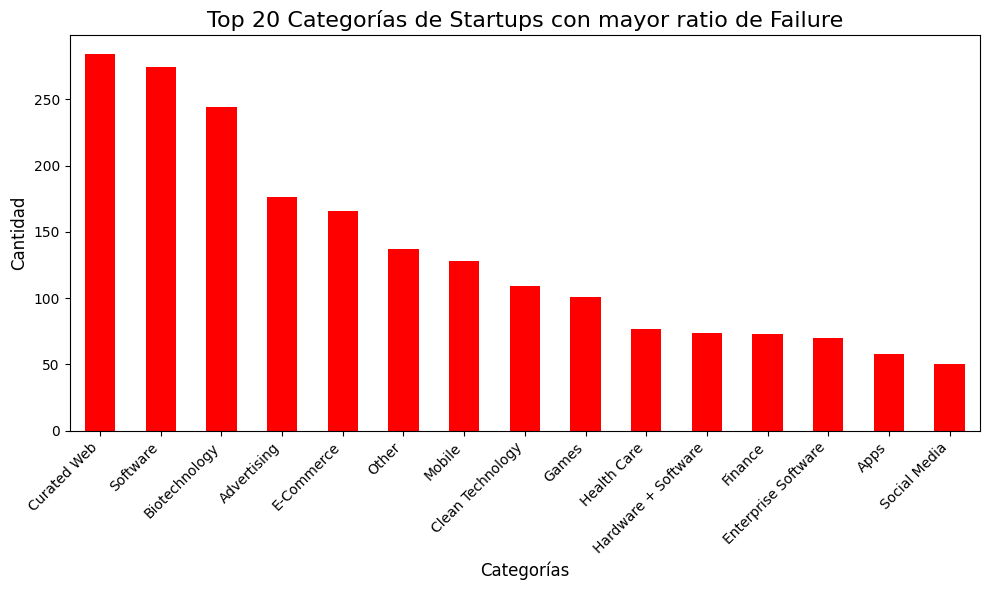

In [158]:
plt.figure(figsize=(10, 6))
top_sectors_fail.plot(kind='bar', color='red')
plt.title('Top 20 Categorías de Startups con mayor ratio de Failure', fontsize=16)
plt.xlabel('Categorías', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#columnas = ["exit_status","country","sector", "country_code", "funding_log", "funding_rounds" ] 

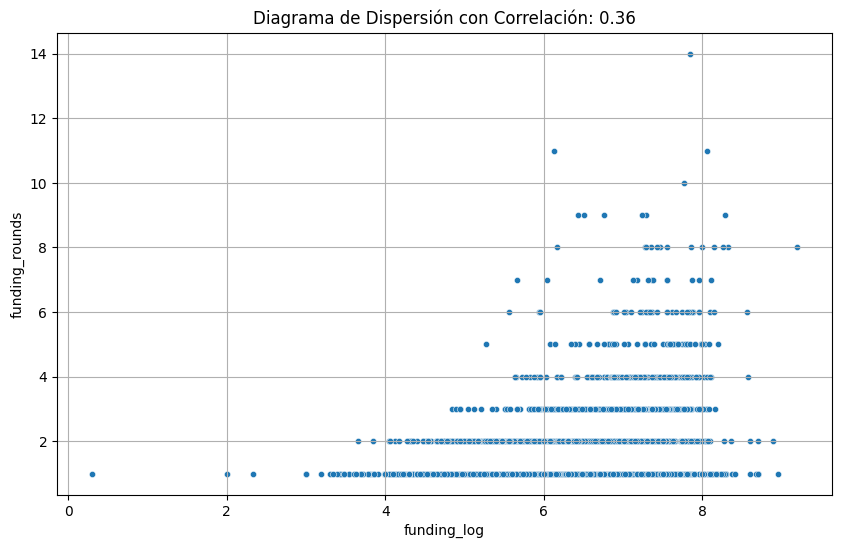

In [159]:
grafico_dispersion_con_correlacion(startups_fail,col_4,col_5, tamano_puntos=20, mostrar_correlacion= True)

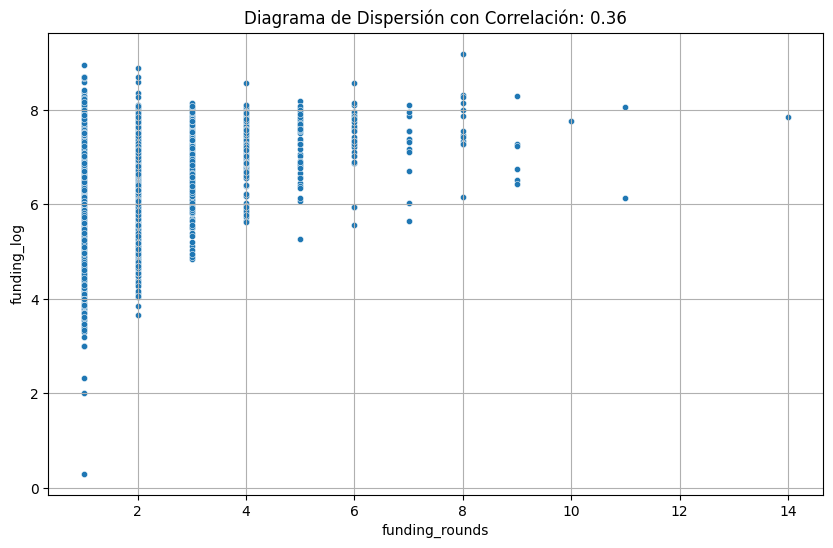

In [160]:
grafico_dispersion_con_correlacion(startups_fail,col_5,col_4, tamano_puntos=20, mostrar_correlacion= True)

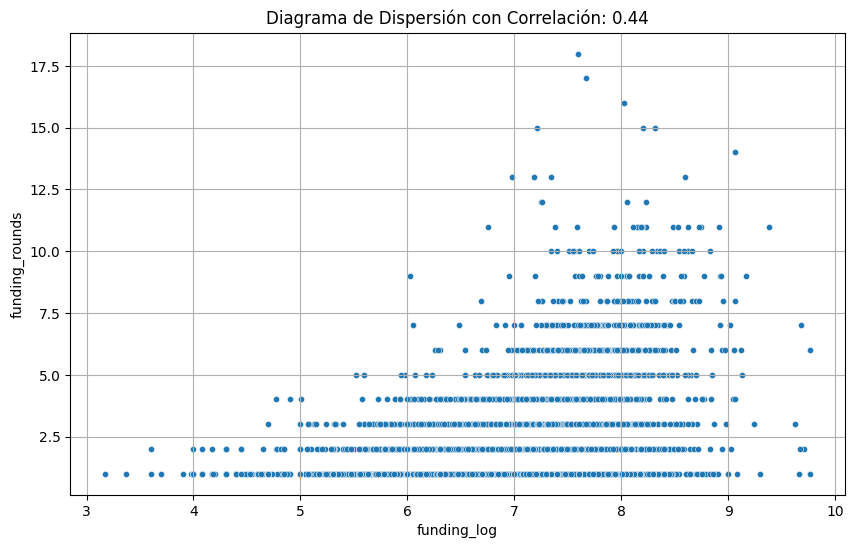

In [162]:
grafico_dispersion_con_correlacion(startups_exit,col_4,col_5, tamano_puntos=20, mostrar_correlacion= True)

In [164]:
corr_matrix = df.corr(numeric_only= True) 
# lo hace con numerica y booleanas, no con texto
# Si no lo pones y tienes variables tipo texto, fallará7
corr_matrix

,funding_total_usd,funding_rounds,founded_at_year,funding_log
funding_total_usd,1.000000,0.209486,-0.099914,0.299896
funding_rounds,0.209486,1.000000,-0.138689,0.442321
founded_at_year,-0.099914,-0.138689,1.000000,-0.392187
funding_log,0.299896,0.442321,-0.392187,1.000000


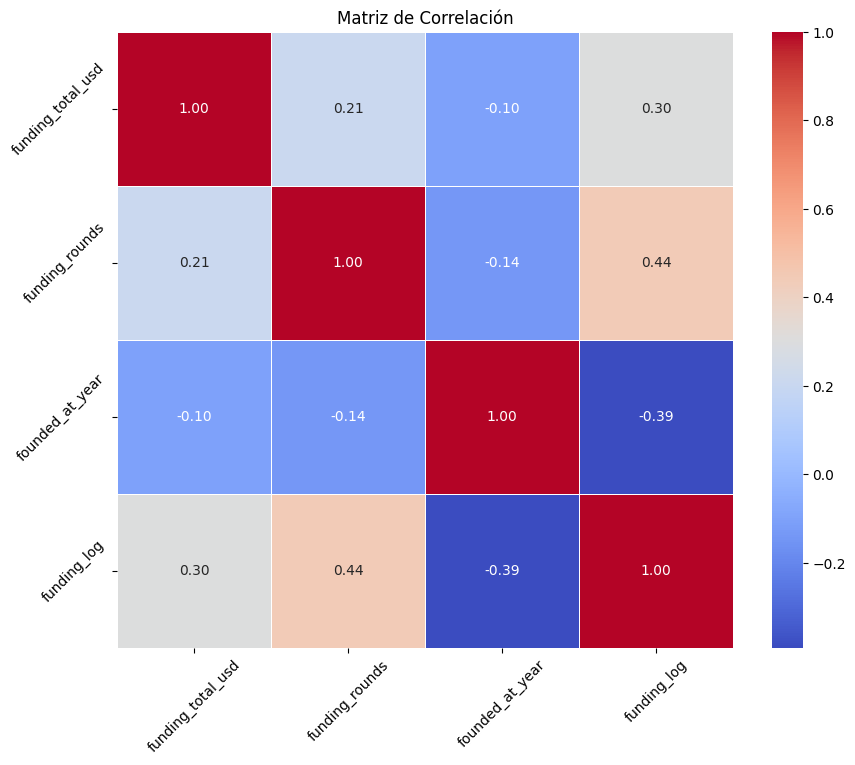

In [165]:
plt.figure(figsize=(10, 8))  # Ya lo veremos pero esto permite ajustar el tamaño de las gráficas
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar=True, square=True, linewidths=.5) # el cmap es el rango de colores usado para representar "el calor"

plt.title('Matriz de Correlación')
plt.xticks(rotation=45)  # Rota las etiquetas de las x si es necesario
plt.yticks(rotation=45)  # Rota las etiquetas de las y si es necesario

plt.show()
